## Objectives

The objective of the final project will be to build a fully reproducible project that uses ML to address a question of your choice (e.g. in academic or industry).The dataset required for this project is provided along with this document (see details below). This is an individual project. Since this course is an advanced undergraduate/graduate student level course, it is expected that the final report should be publishable and fully reproducible.

The deliverable of this project is a folder with all the following components:

1. A README file (text file) to briefly introduce the project idea and how it is organized.
2. Well documented Python code to read, explore, and clean data; all processes should be automated and no hand edit on raw data
3. Well documented Python code to manipulate, wrangle, visualize data. Well documented Python code to run ML models and make publication-worthy figures or tables
4. Final report should be submitted in PDF. This file should be structured with Introduction, Methods and Materials, Results, Discussion, and Conclusions (see below). We should be able to reproduce your workflow and regenerate your final report.

## Domain: Banking

Context: This data set contains historical data of the customers who have taken loans from a German bank and the bank is facing issues with loan defaulters. The bank intends to build a machine learning model to predict whether the customer will default or not based on historical data

## Dataset - German_bank.csv

Data Description: The bank has historical information on relevant features for each customer such as employment duration, existing loans count, saving balance, percentage of income, age, default status. 

The data set has 17 columns and 1000 rows. Columns are described below and each row is a customer. 

* **checking_balance - Amount of money available in account of customers**
* **months_loan_duration - Duration since loan taken**
* **credit_history - credit history of each customers**
* **purpose - Purpose why loan has been taken**
* **amount - Amount of loan taken**
* **savings_balance - Balance in account**
* **employment_duration - Duration of employment**
* **percent_of_income - Percentage of monthly income**
* **years_at_residence - Duration of current residence**
* **age - Age of customer**
* **other_credit - Any other credits taken**
* **housing- Type of housing, rent or own**
* **existing_loans_count - Existing count of loans**
* **job - Job type**
* **dependents - Any dependents on customer**
* **phone - Having phone or not**
* **default - Default status (Target column)**

## Import required packages and Load the dataset

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (make_scorer,accuracy_score, ConfusionMatrixDisplay, mean_squared_error,
                             confusion_matrix,recall_score, f1_score, precision_score, RocCurveDisplay,
                            roc_curve, roc_auc_score)

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

from sklearn.ensemble import VotingClassifier,AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [212]:
org = pd.read_csv('./credit.csv')

org.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [213]:
df = org.copy()

## Exploratory Data Analysis or Visualizing Data

In [214]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [215]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

0

**There are 7 integer(numerical) variables and 10 categorical variables. The task is to model the variable 'default' using other predictors. There are no null values in any row and column in the given dataset**

In [216]:
df.describe().T # for numerical features

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [217]:
df.describe(include=['O']).T # for categorical columns

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


The minimum amount of loan taken is 250.0 and the maximum amount of loan taken is 18424.0.

### Plotting categorical variables or features

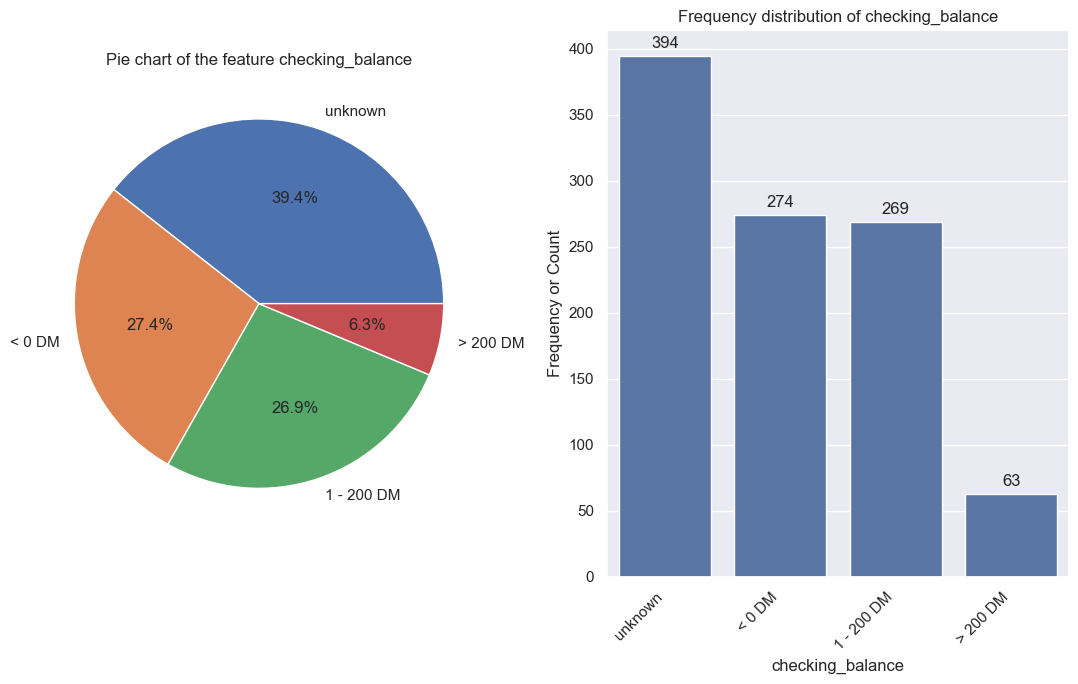

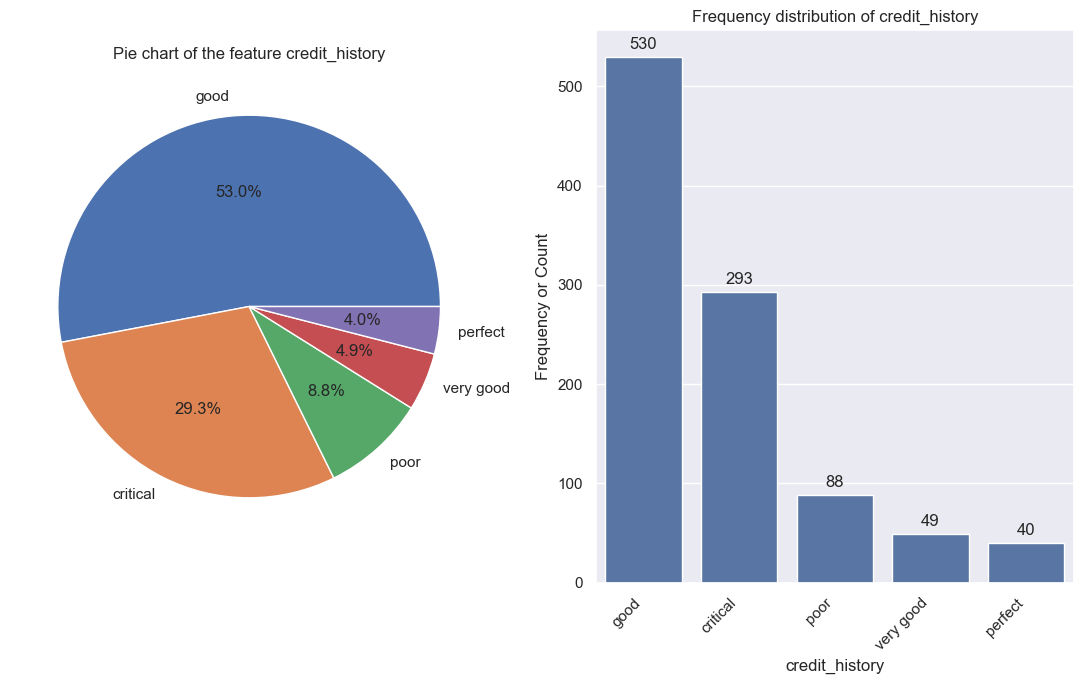

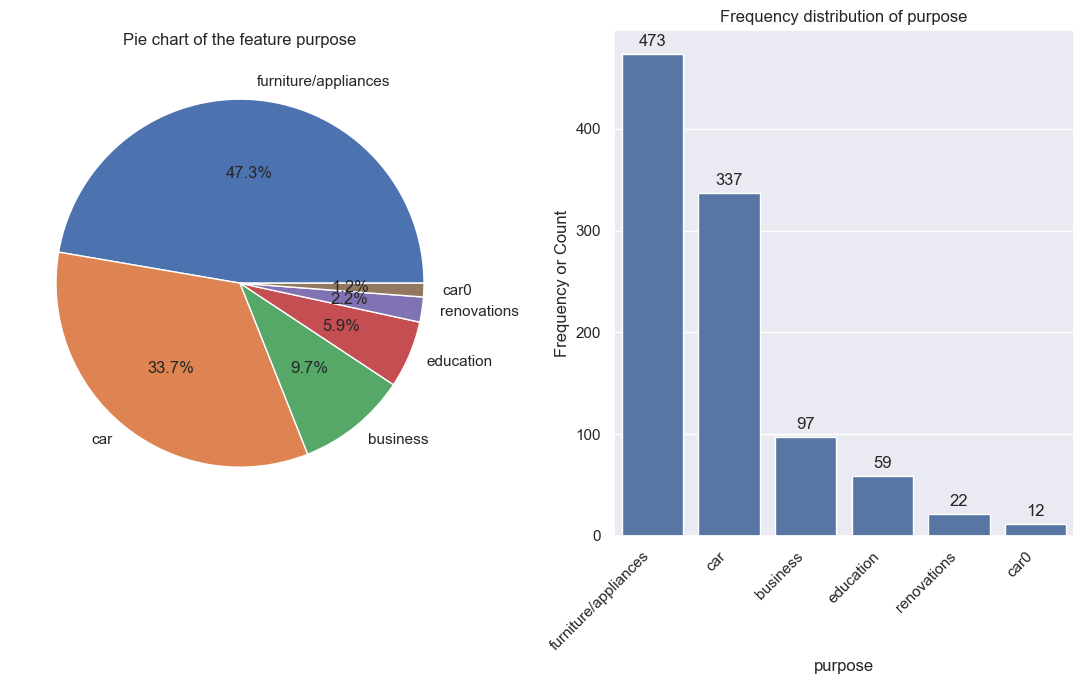

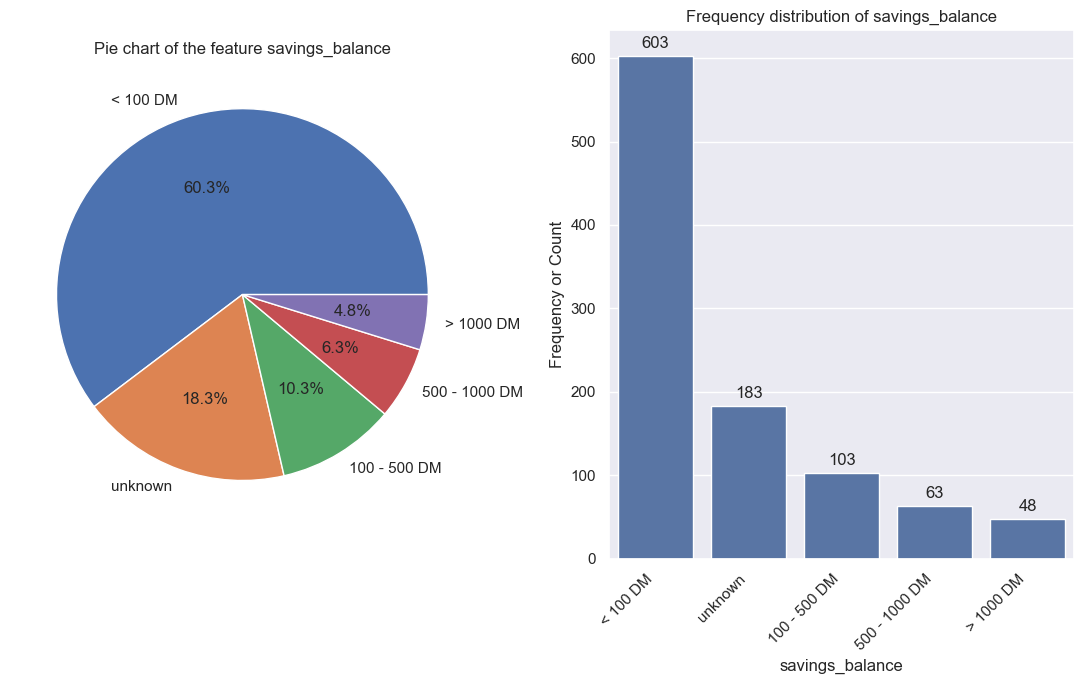

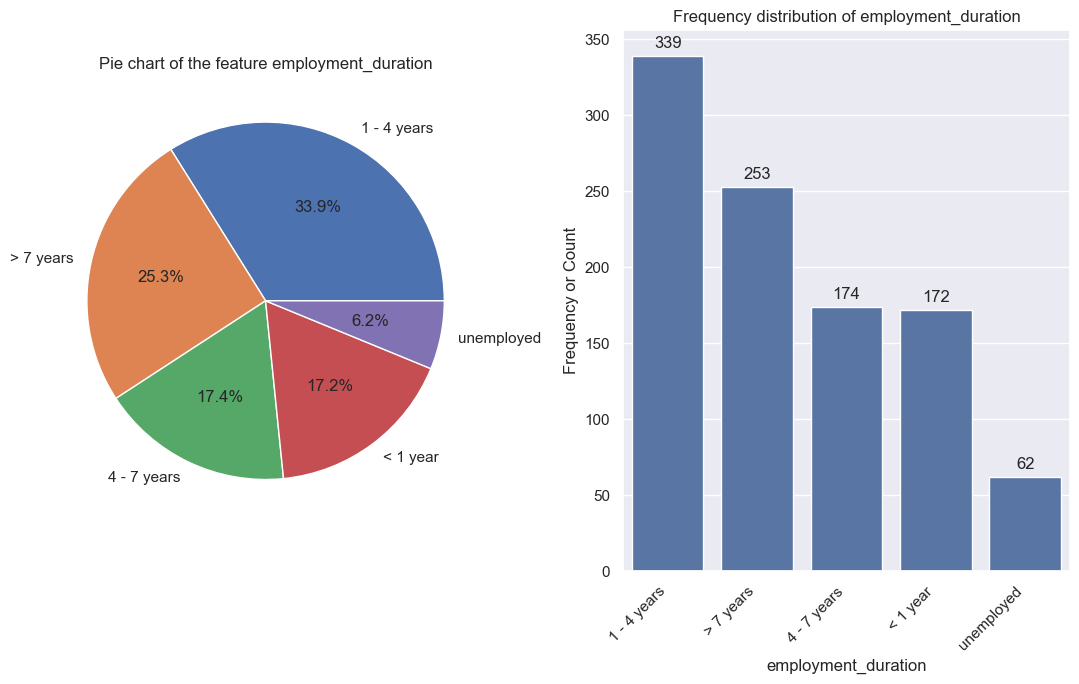

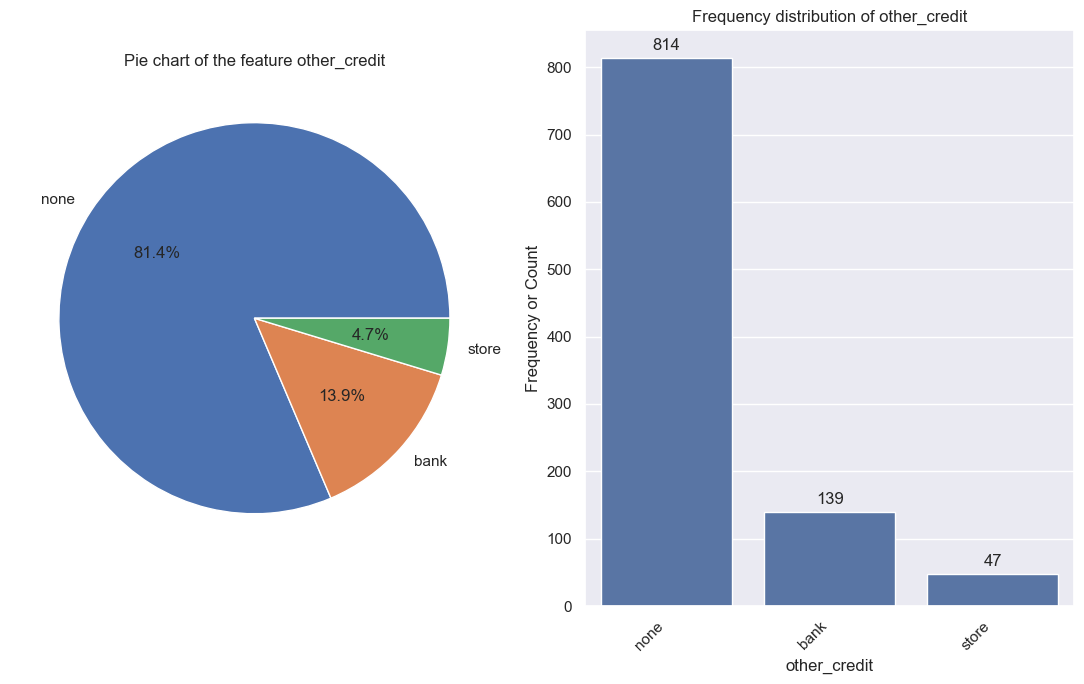

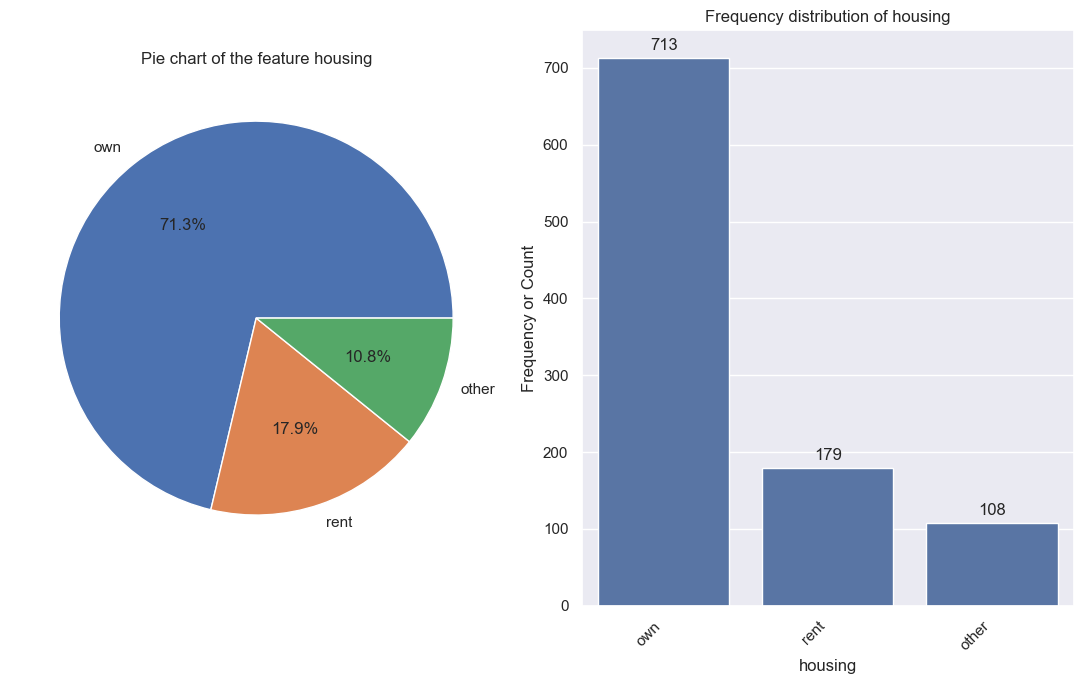

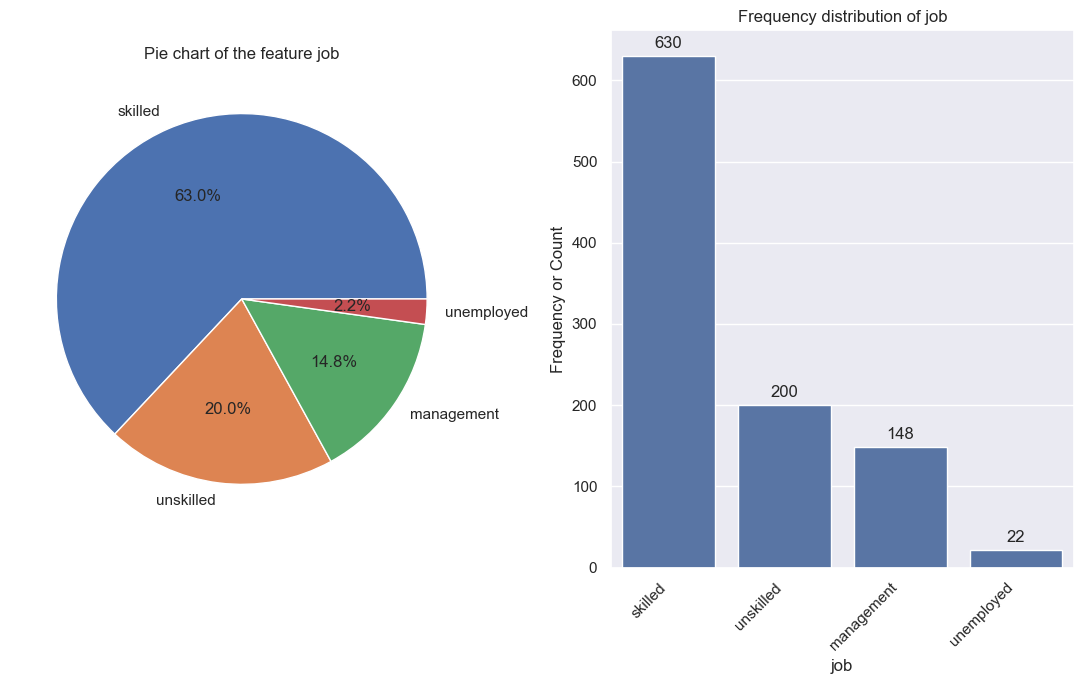

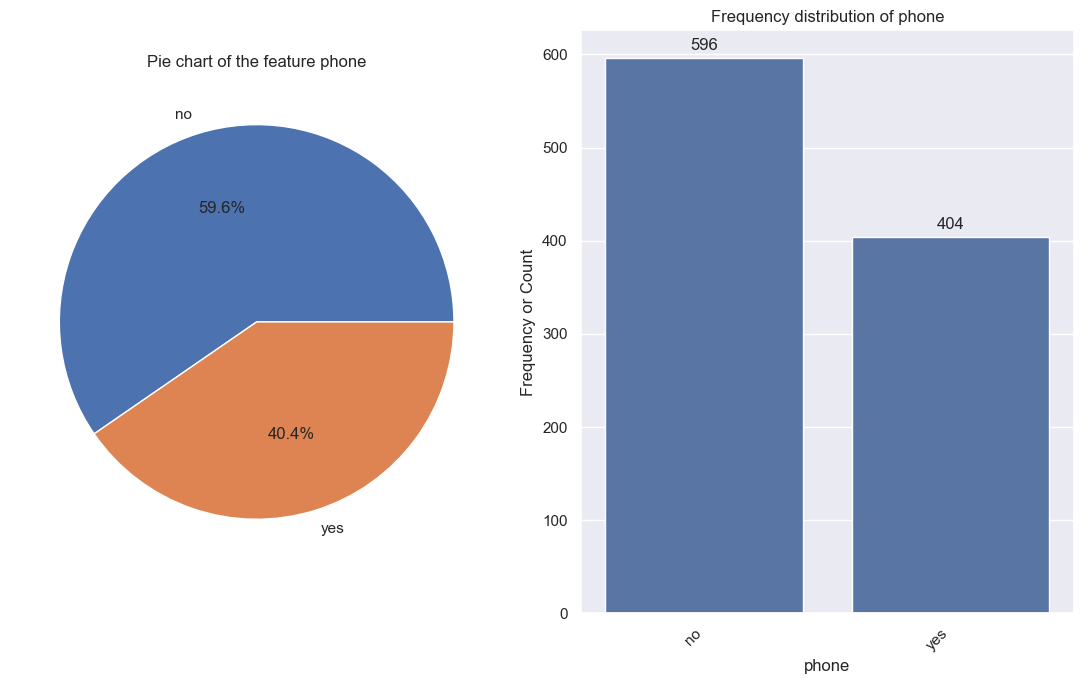

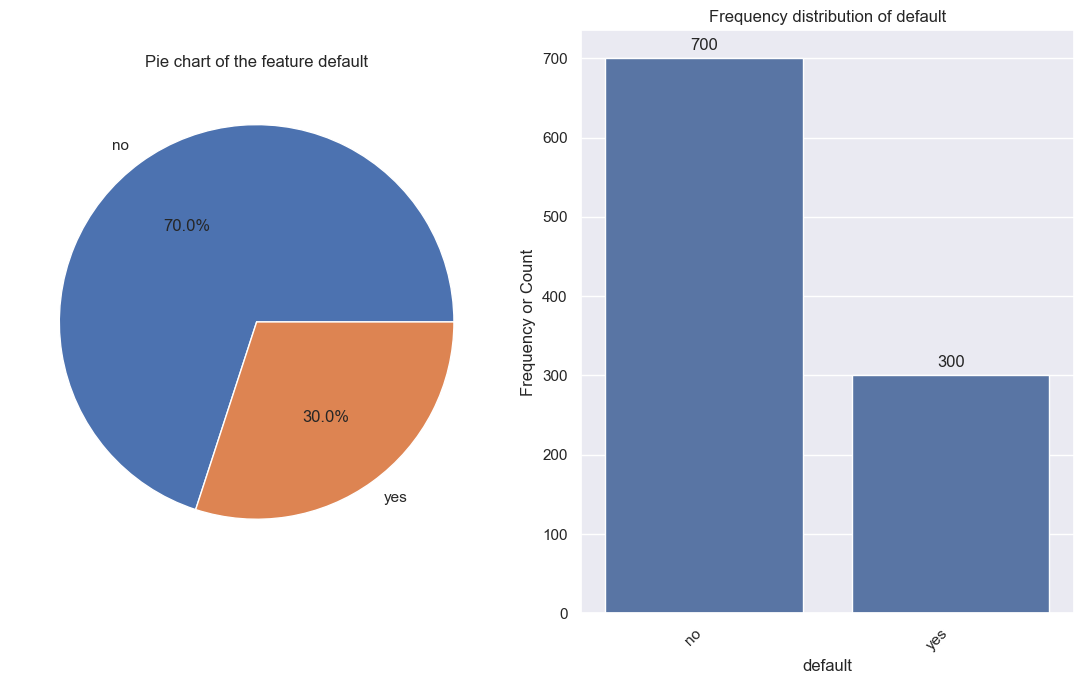

In [218]:

categorical_cols_df = df.select_dtypes('object')

categorical_cols = categorical_cols_df.columns

for col in categorical_cols:

    #if df[col].dtype=='O': ## picking categorical columns only
        #print(f'Unique values in {col} =',df[col].unique(),'\n')

    fig, axes = plt.subplots(1, 2, figsize=(11, 7))
    value_counts = df[col].value_counts()
    #print(value_counts)
    
    axes[0].pie(value_counts,labels=value_counts.index, autopct="%1.1f%%")
    axes[0].set_title(f'Pie chart of the feature {col}')

    # Barplot or frequency plot
    sns.countplot(x = col, data =df, ax=axes[1],order=value_counts.index)
    axes[1].set_title(f'Frequency distribution of {col}')
    plt.ylabel('Frequency or Count')
    plt.xticks(rotation=45,ha='right')

    #display frequency on top of each bar
    for patch in axes[1].patches:
        #print(patch)
        axes[1].annotate(format(patch.get_height(), '.0f'), (patch.get_x() + patch.get_width() / 2., patch.get_height()), ha = 'center', va = 'center', 
                          xytext = (0, 9), textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()
    print('\n\n\n')

1.  There is some class imbalance in the data that is there are 700 customers who did not default whereas there are only 300 customers who did default. The data seems to be bit biased towards customers who did not default.

2.  There are 596 customers who possess a phone and 404 customers who do not own a phone.

3.  Based on the job and skill the customers are distibuted as follows- 630 skilled workers, 200 unskilled workers, 148 management workers and 22 unemployeed customers.

4.  713 customers have a own house whereas 179 customers live in a rented home. There are 108 customers who neither own a house nor live in a rented home. These customers are respresened by the category 'other'.

5.  There are 814 customers who did not take other credit from anywhere but there are 139 customers who took other credit from a bank and 47 customers who took credit from a store.

6.  There are 172 customers whose employment duration is less than 1 year, 339 customers whose employment duration is between 1 to 4 years, 174 customers whose employment duration is between 4 to 7 years, 253 customers whose employment duration is greater than 7 years and 62 customers who are unemployed.

7. Majority of the customers(603) have a savings balance less than 100DM and few customers(63) have a savings balance between 500-1000 DM and only 48 customers have greater than 1000DM. Moreover there are 183 customers with unknown savings balance and 103 customers with saving balance between 100 to 500 DM.

8. The purpose column represents the purpose for which the loan was taken. There are two categories representing car- one is named as 'car' whereas the other column is names as 'car0'. Both represent that the loan was taken to purchase a car but there seems to be a spelling mistake.

9. Majority of customers(473) took loan to buy furnitur/ appliances where as very few(22) took loan for renovations. Around 349 customers(car + car0) took loan to buy a car and 97 customers took loan for business purpose but only 59 took loan for education purpose.

10. Majority of the customers(530) have a good credit history and only 40 have a prefect credit history. There are significant number of customers(293) with critical credit history. Additionally, there are 88 customers with a poor credit history but only 49 with a very good credit history.

11. There are 394 customers with unknown checkings balance, 274 customers with checking balance less than 0DM, 269 customers with checking balance between 1-200DM and only 63 customers with checking balance greaterthan 200DM.

### Plotting countplot of categorical variables based on the different classes in the response 'default' 

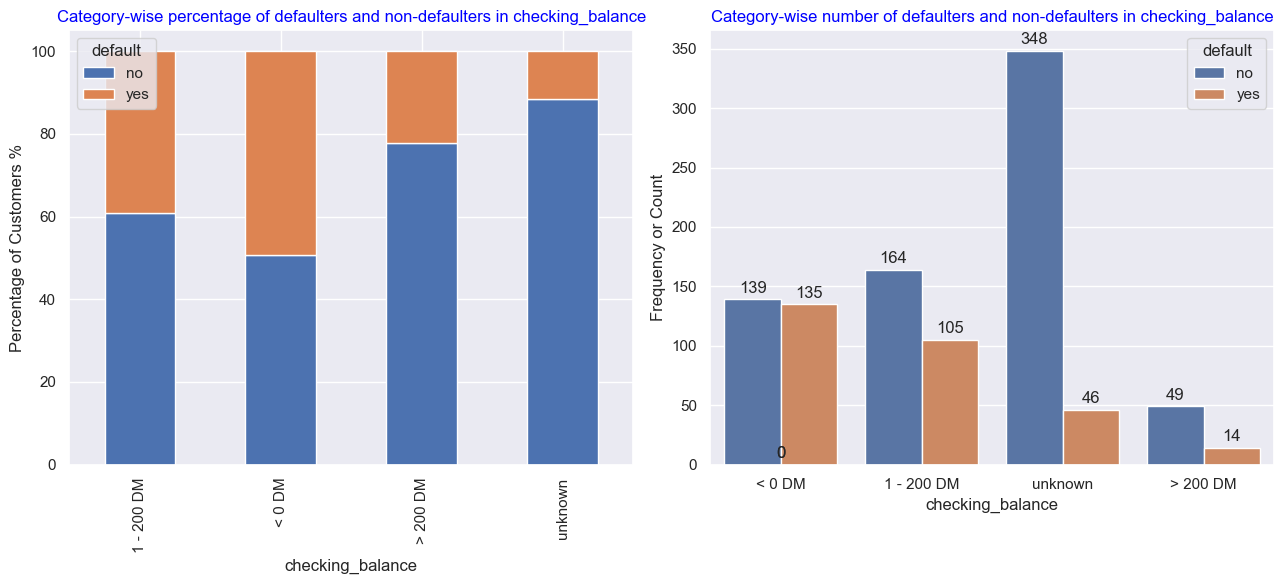

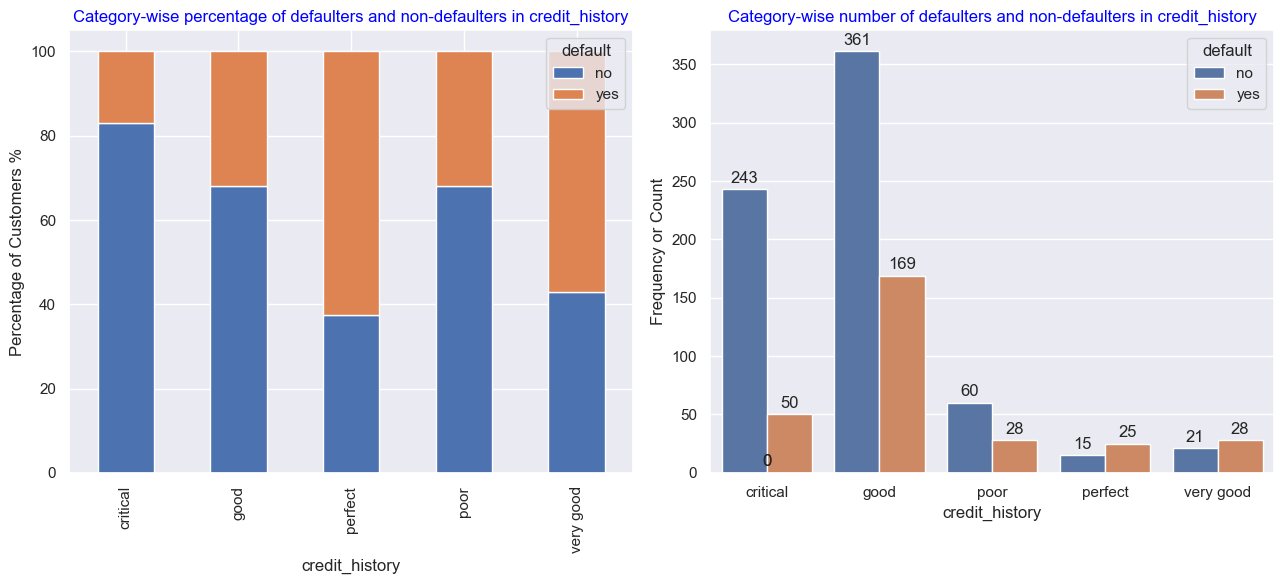

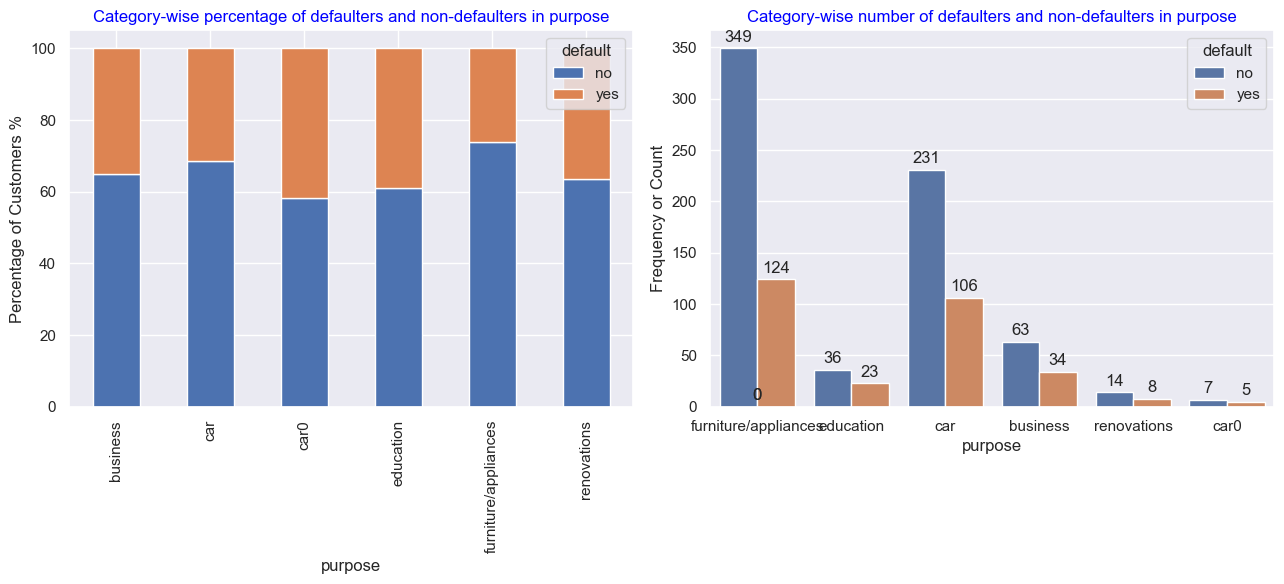

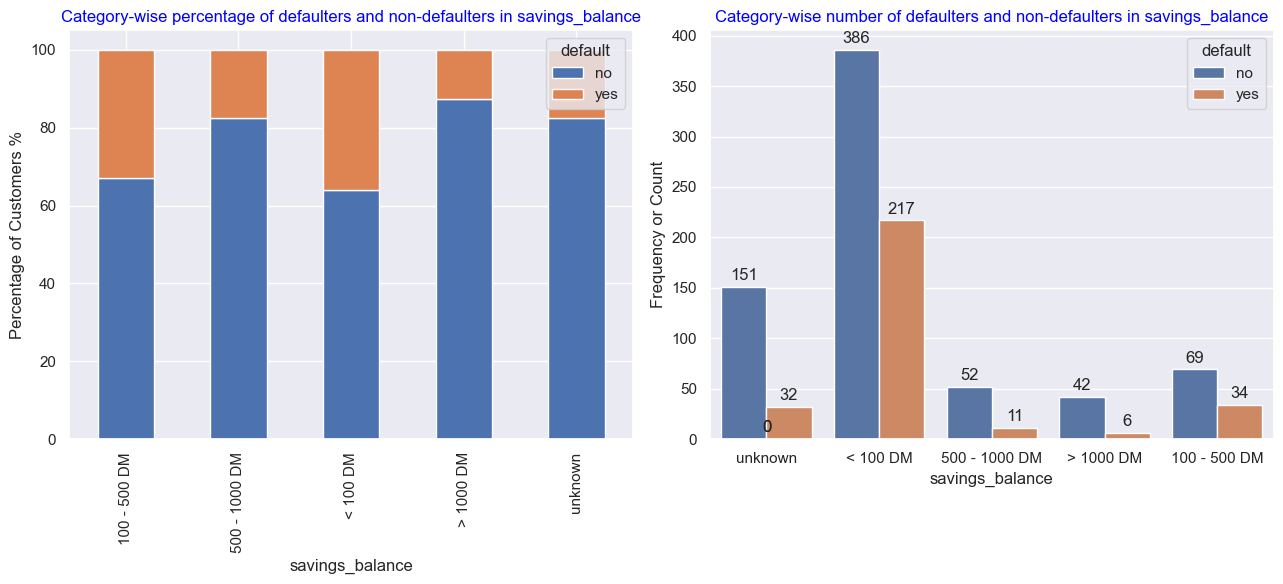

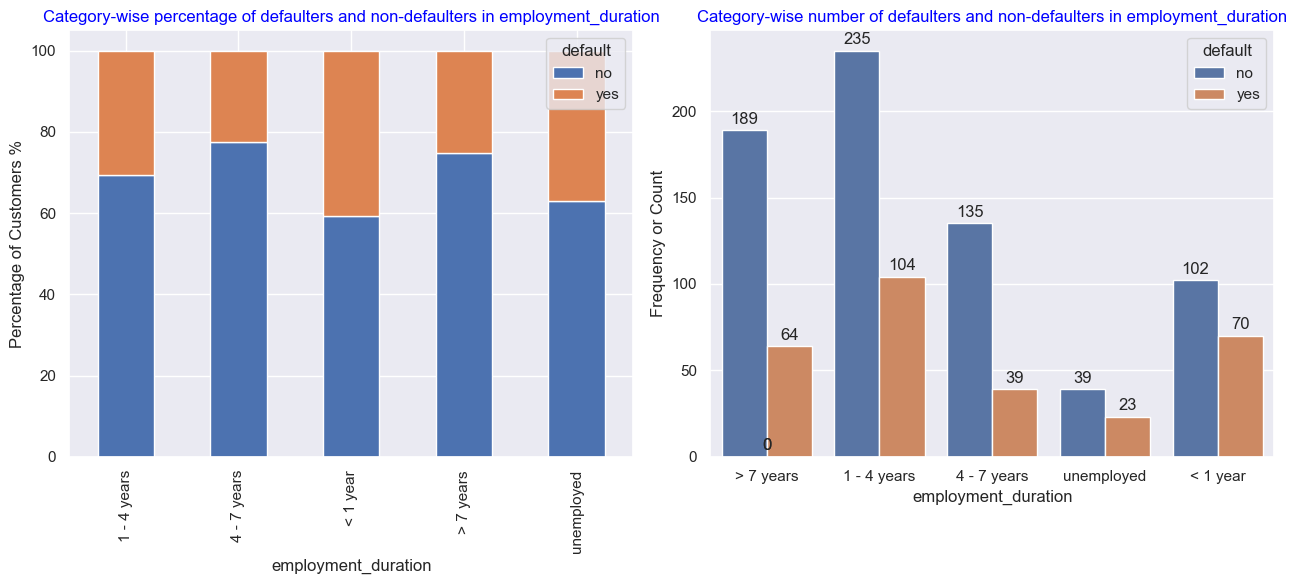

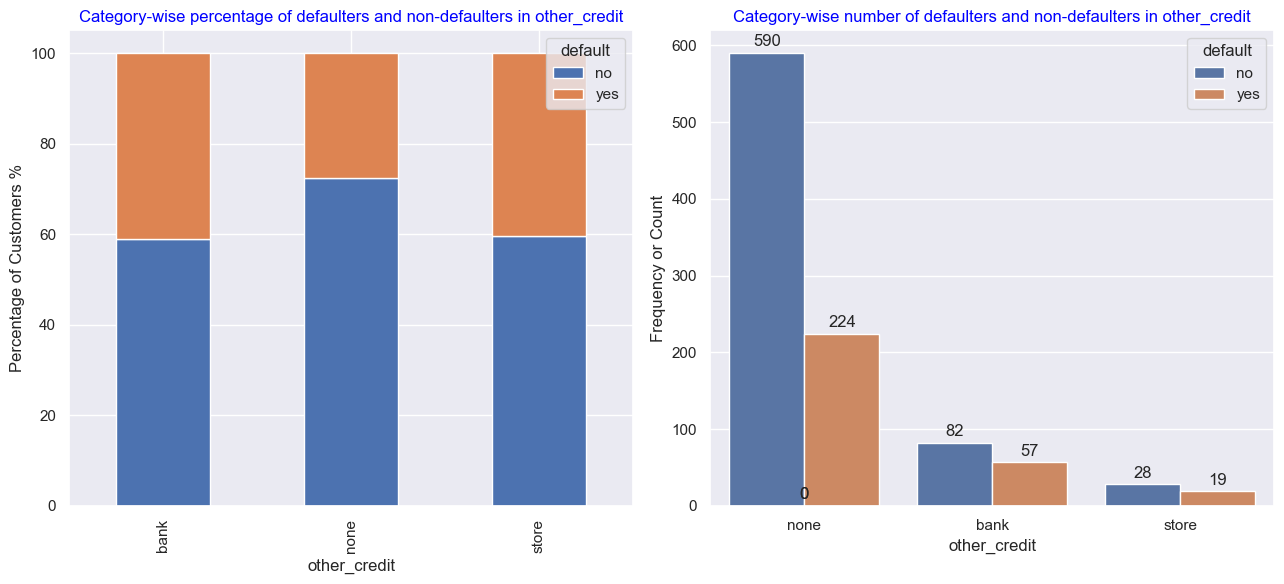

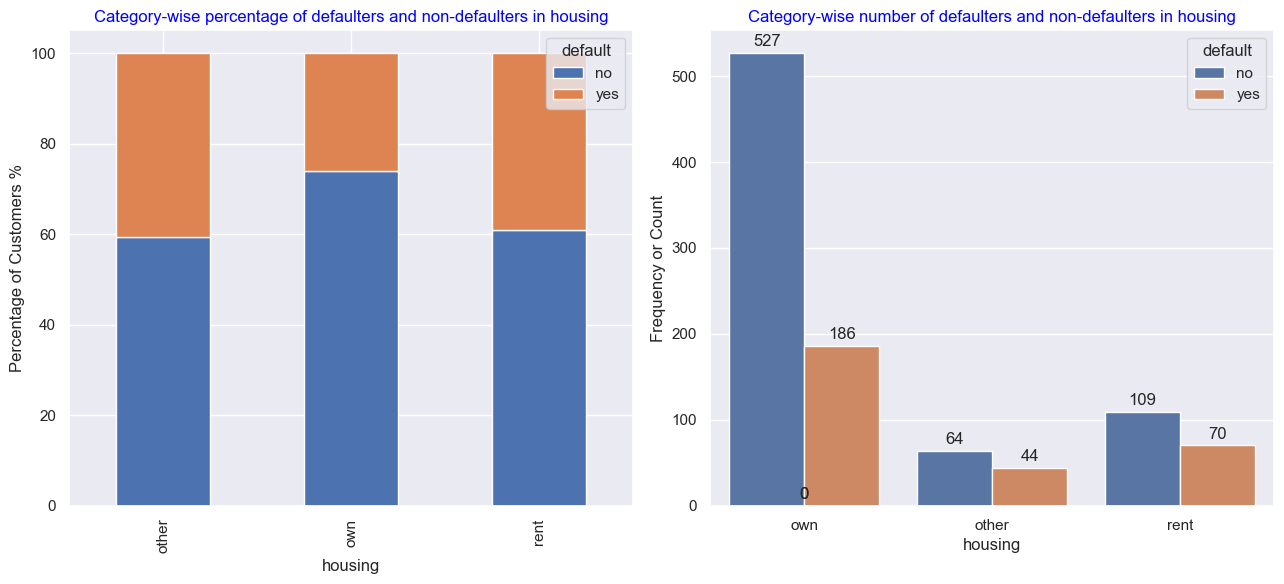

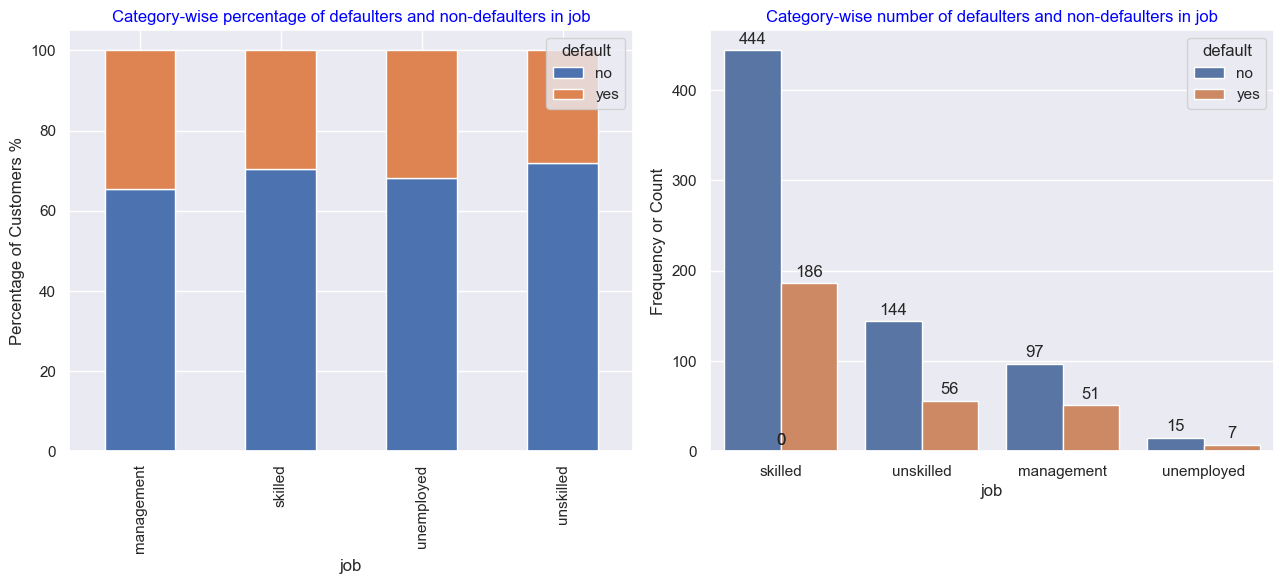

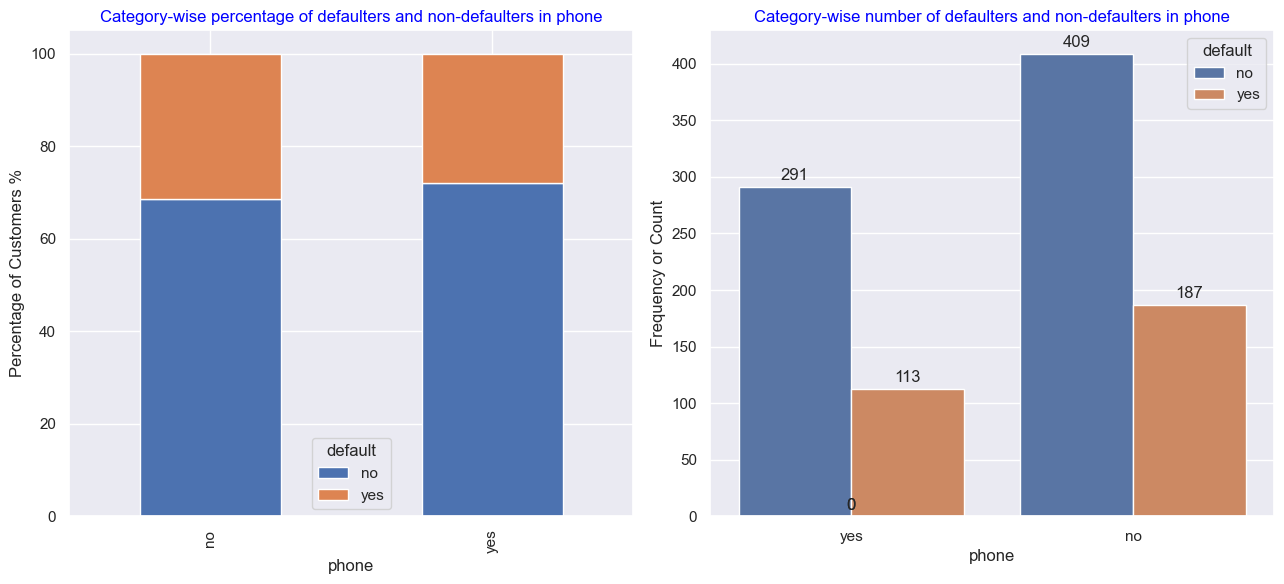

In [219]:
for cat_col in categorical_cols:
    if cat_col!='default':

        fig, axes = plt.subplots(1, 2, figsize=(13, 6))
        (pd.crosstab(df[cat_col], df["default"], normalize="index") * 100).plot(kind="bar", stacked=True, ax=axes[0])
        axes[0].set_title(f'Category-wise percentage of defaulters and non-defaulters in {cat_col}', color='blue')
        axes[0].set_ylabel("Percentage of Customers %")
        
  
        sns.countplot(x=cat_col, hue='default', data=df, ax=axes[1])
        axes[1].set_ylabel('Frequency or Count')
        axes[1].set_title(f"Category-wise number of defaulters and non-defaulters in {cat_col}", color='blue')
        
        # add counts to plot
        for patch in axes[1].patches:
            axes[1].annotate(
                format(patch.get_height(), '.0f'), 
                (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), textcoords='offset points'
            )
        
        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()
        


        print('\n\n\n')

1. From the above category-wise graphs, we can identify which category of a variable has larger and smaller number of defaulters(customers).

2. It is clear that customers belonging to the category '<0 DM' in the variable checking_balance has highest number of defaulters whereas the customers belonging to the category 'unknown' has least number of defaulters.

3. From the observations made on the feature credit_history, it is surprising to see that the customers belonging to the categories 'perfect' and 'very good' default on their credit. This might have happened due to lack of adequate data about customers with 'perfect' and 'very good' credit history. Out of all the categories, the category 'good' has the highest number of non-defaulters(361) and defaulters(169). The category 'critical' has the lowest percentage of defaulters.

4. Unemployed customers and customers whose employment duration is less than 1 year (<1 year) are more likely to default on their credit.

5. Customers who took loan for the purpose of education and car(car + car0) are more likely to default.

### Plotting Numerical features

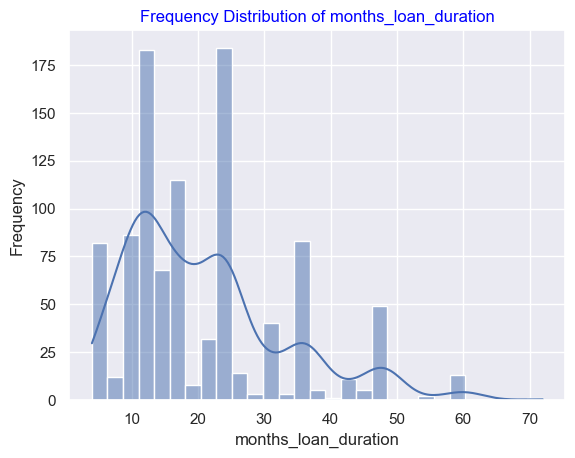

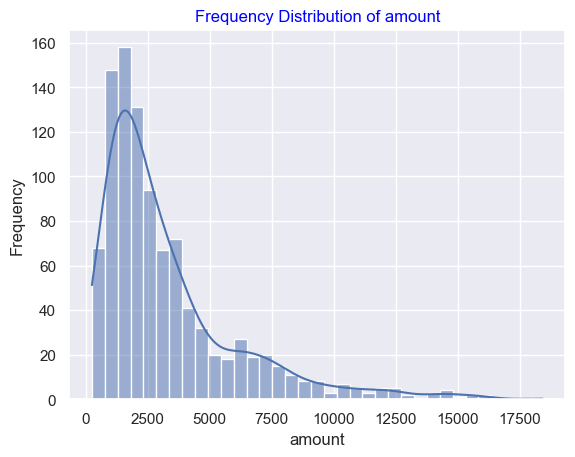

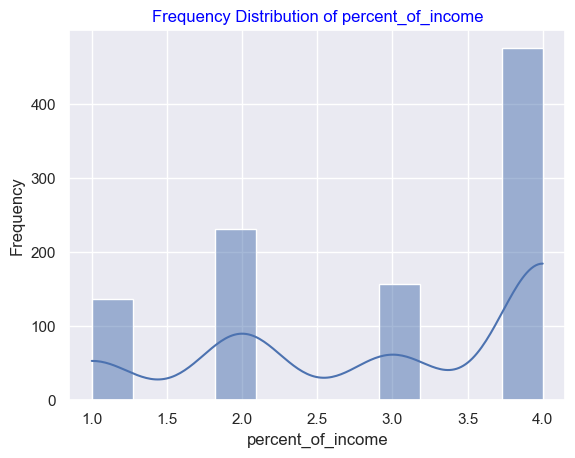

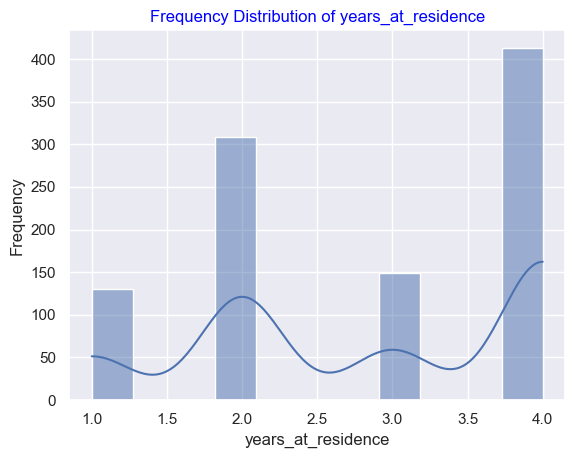

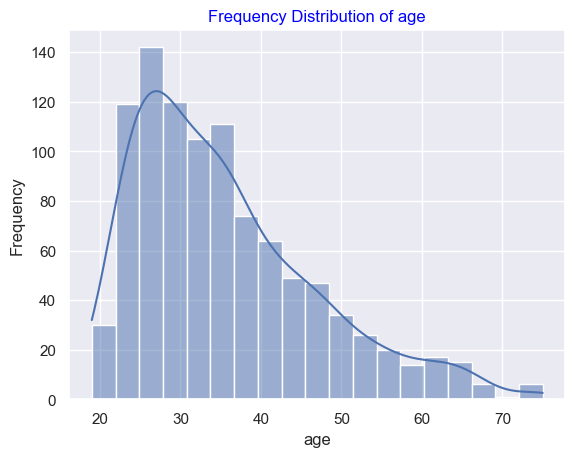

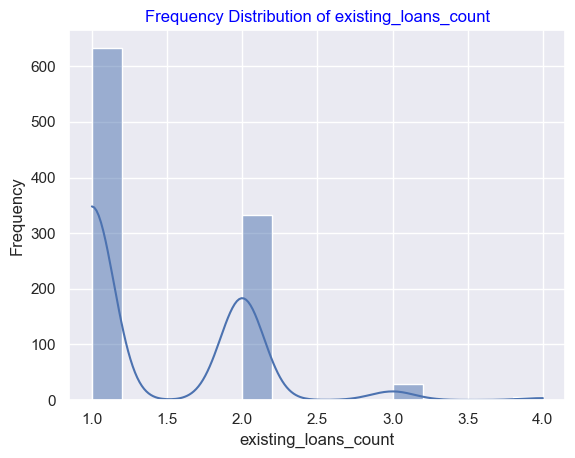

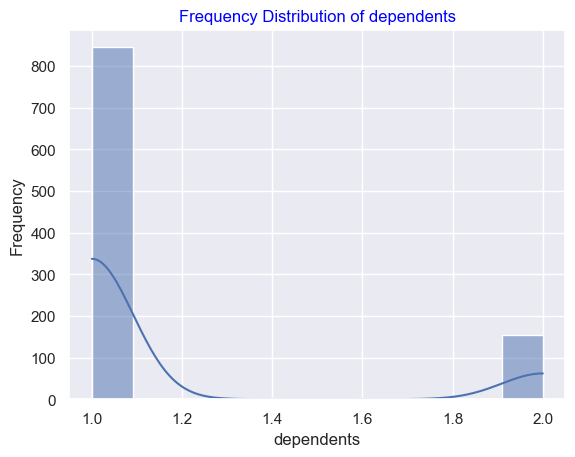

In [220]:
numerical_cols_df = df.select_dtypes('int64')
numerical_cols = numerical_cols_df.columns

for num_col in numerical_cols:

    sns.histplot(data=df, x=num_col, kde='True')
    plt.title(f'Frequency Distribution of {num_col}', color='blue')
    plt.ylabel('Frequency')
    plt.show()
    print('\n\n\n')

### Correlation Matrix

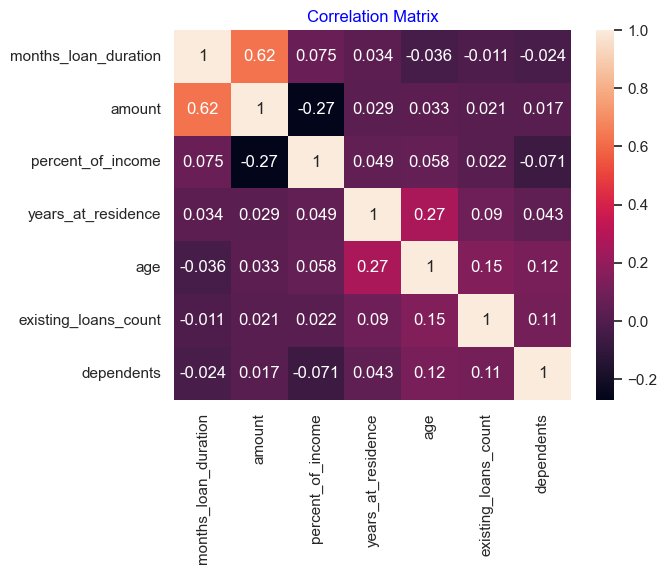

In [221]:
corr_matrix = numerical_cols_df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix', color='blue')
plt.show()

**There is a moderately strong correlation between amount and months_loan_duration. They are positively correlated with each other.**

### Overview of relation between the median of numerical features and the response 'default'

In [222]:
df.groupby(['default'])[numerical_cols].median()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
default,,,,,,,
no,18.0,2244.0,3.0,3.0,34.0,1.0,1.0
yes,24.0,2574.5,4.0,3.0,31.0,1.0,1.0


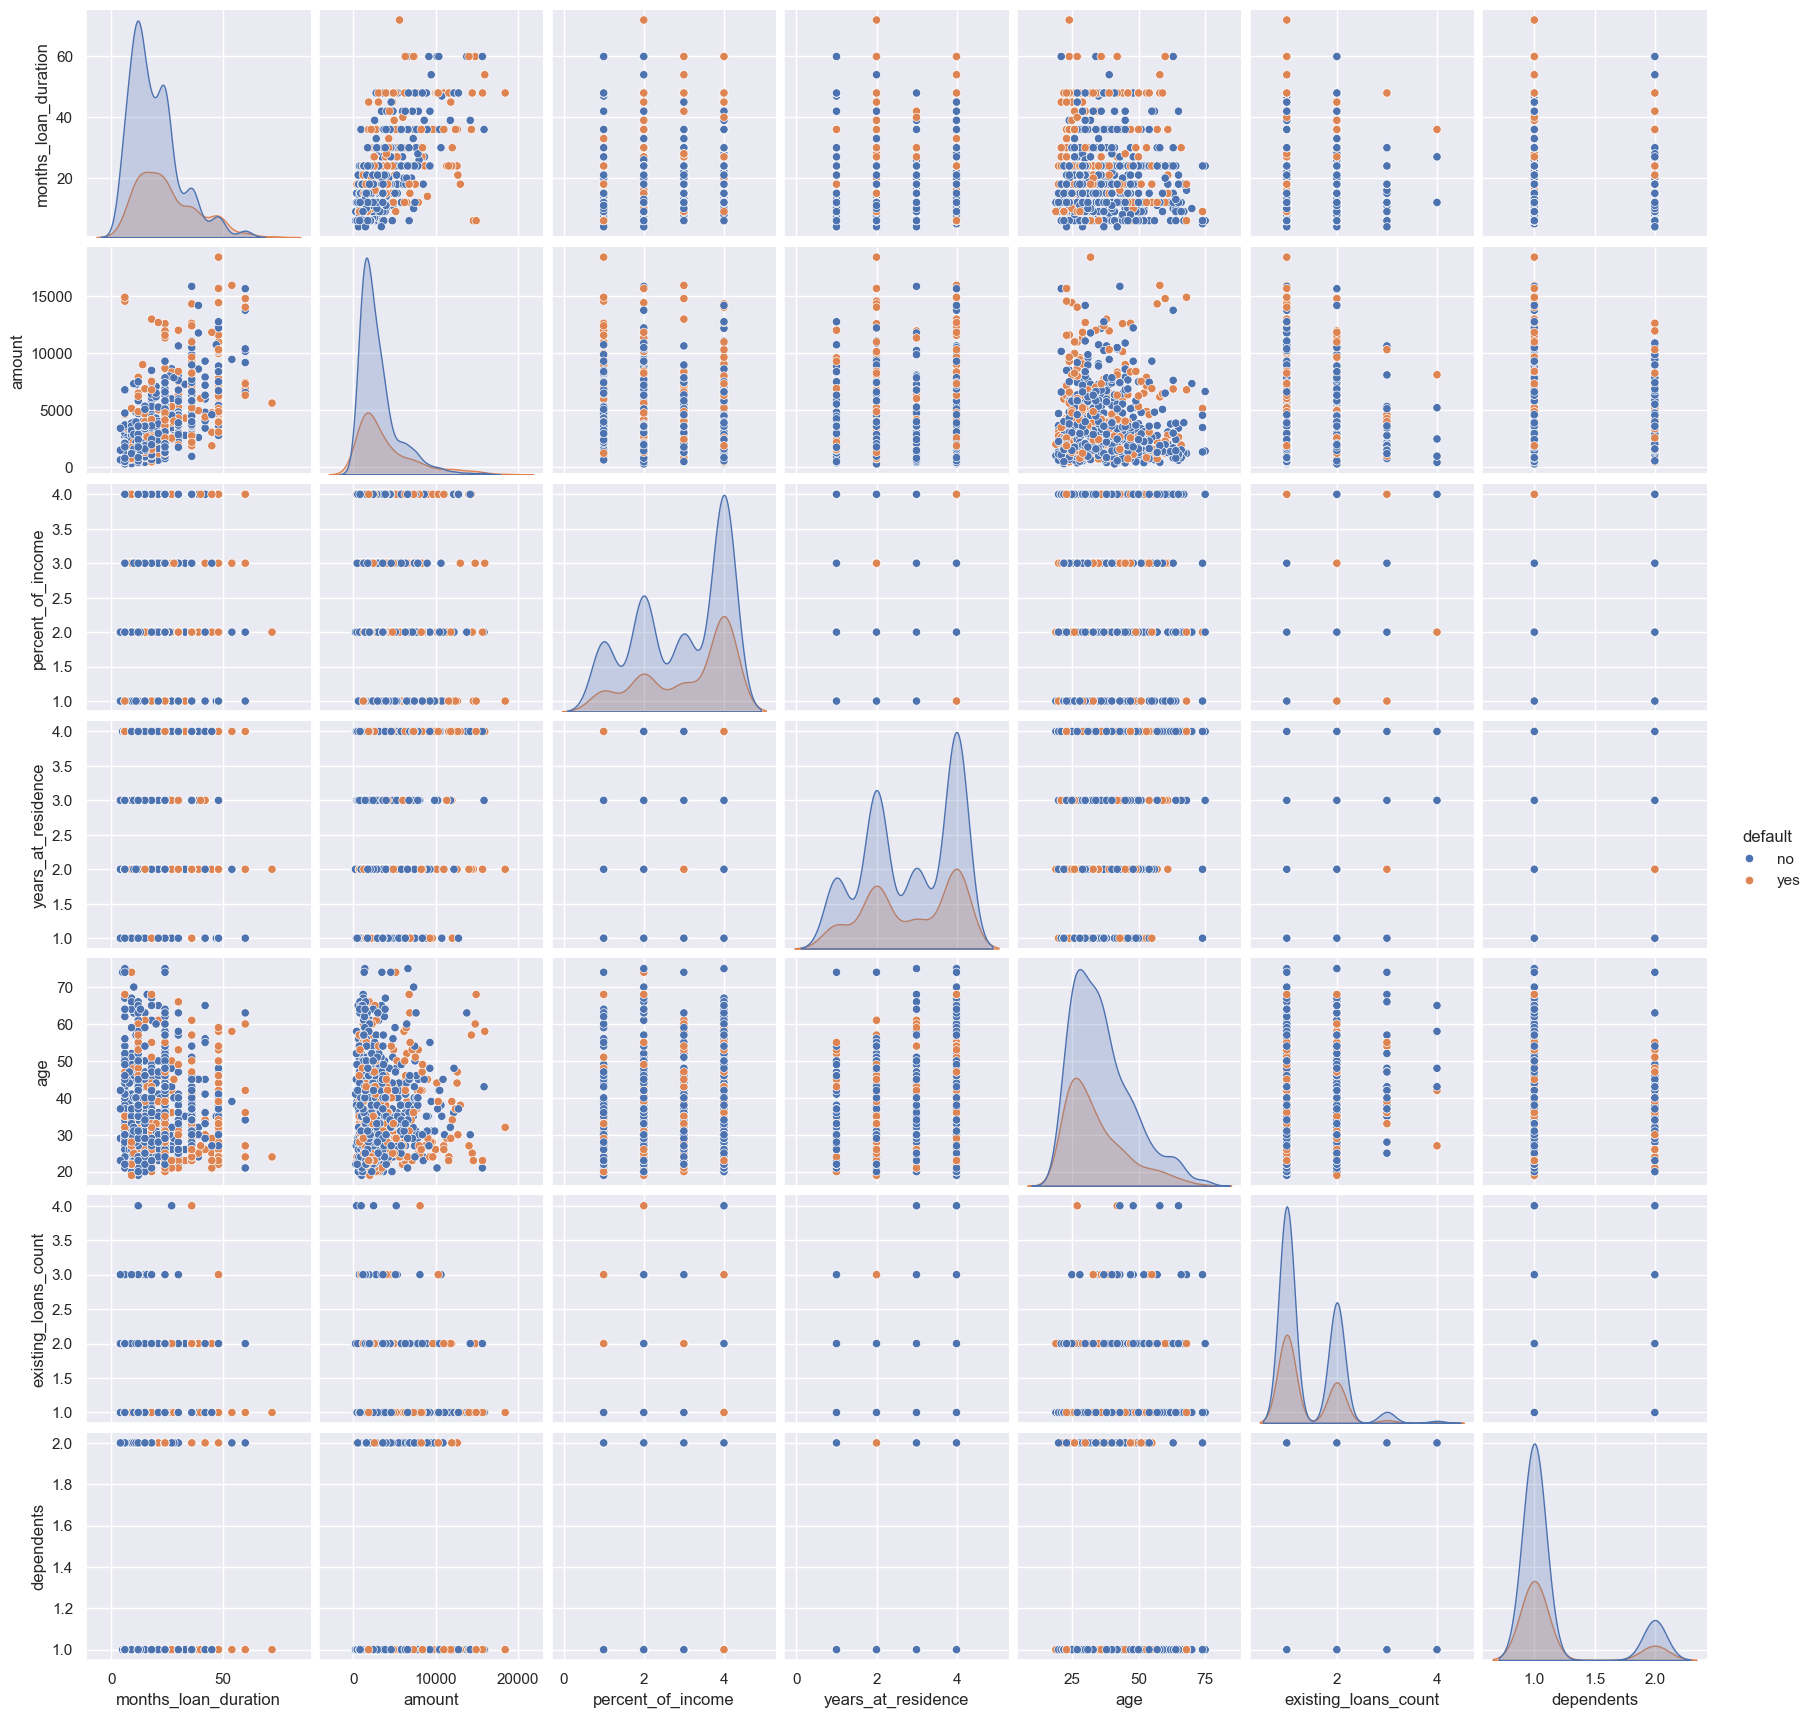

In [223]:
sns.pairplot(df, hue='default')

## Pre-processing data for model training


1. In the categorical variable 'purpose', both 'car' and 'car0' are same but given as different categories. So, 'car0' should be replaced by 'car'.

2. There total 10 categorical variables. Out of which some are ordinal vairables where as some are nominal variables.

3. Nominal varibles:- default(target variable or response), phone, housing, other_credit, job, savings_balance, purpose, checking_balance. Actually, checking_balance and savings_balance should be ordinal variables but they both have category 'unknown' in large numbers. Hence, it cannot be deleted and cannot be given any order. So, these two variables are considered nominal variables.

4. Ordinal variabes:- credit_history(**'critical'** < **'poor'** < **'good'** < **'very good'** < **'perfect'**) , 
                       employment_duration(**'unemployed'** < **'<1 year'** < **'1-4 years'** < **'4-7 years'** < **'> 7 years'** )

5. The numerical variable amount has a large range from 250 to 18424. Hence, numerical variable amount should be normalized.

In [224]:
ordinal_dict = {
    'credit_history': ['critical','poor','good','very good','perfect'],
    'employment_duration':['unemployed','< 1 year','1 - 4 years', '4 - 7 years','> 7 years']
}

nominal_cols = ['phone', 'housing', 'other_credit', 'job', 'savings_balance', 'purpose', 'checking_balance']

In [225]:
# replace car0 with car as both are same
df['purpose'].replace('car0','car', inplace=True)
df['purpose'].value_counts()

furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64

In [226]:
X = df.drop(columns=['default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 16) (300, 16) (700,) (300,)


In [227]:
preprocess_transformer = ColumnTransformer(transformers=[
    ('num_tnf',MinMaxScaler(),['amount']),
    ('ord_tnf', OrdinalEncoder(categories=[ordinal_dict['credit_history'],ordinal_dict['employment_duration']]),['credit_history','employment_duration']),
    ('nominal_tnf',OneHotEncoder(sparse_output=False,drop='if_binary'),nominal_cols),
    

],remainder='passthrough')

preprocess_transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_tnf', MinMaxScaler(), ['amount']),
                                ('ord_tnf',
                                 OrdinalEncoder(categories=[['critical', 'poor',
                                                             'good',
                                                             'very good',
                                                             'perfect'],
                                                            ['unemployed',
                                                             '< 1 year',
                                                             '1 - 4 years',
                                                             '4 - 7 years',
                                                             '> 7 years']]),
                                 ['credit_history', 'employment_duration']),
                                ('nominal_tnf',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 ['phone', 'housing', 'other_credit', 'job',
                                  'savings_balance', 'purpose',
                                  'checking_balance'])])

In [228]:
X_train_processed = preprocess_transformer.fit_transform(X_train)
X_train_processed

,num_tnf__amount,ord_tnf__credit_history,ord_tnf__employment_duration,nominal_tnf__phone_yes,nominal_tnf__housing_other,nominal_tnf__housing_own,nominal_tnf__housing_rent,nominal_tnf__other_credit_bank,nominal_tnf__other_credit_none,nominal_tnf__other_credit_store,...,nominal_tnf__checking_balance_1 - 200 DM,nominal_tnf__checking_balance_< 0 DM,nominal_tnf__checking_balance_> 200 DM,nominal_tnf__checking_balance_unknown,remainder__months_loan_duration,remainder__percent_of_income,remainder__years_at_residence,remainder__age,remainder__existing_loans_count,remainder__dependents
129,0.178772,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,12,3,2,29,2,1
206,0.092715,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,12,4,4,43,3,1
88,0.109992,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,18,4,3,30,1,2
707,0.149609,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,12,4,3,25,2,1
38,0.053648,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,10,2,2,37,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.042808,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,18,4,3,36,2,1
226,0.589358,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,48,1,2,27,2,1
637,0.847529,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,60,2,4,21,2,1
649,0.023880,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,12,4,4,40,1,2


In [229]:
X_test_processed = preprocess_transformer.transform(X_test)
X_test_processed

,num_tnf__amount,ord_tnf__credit_history,ord_tnf__employment_duration,nominal_tnf__phone_yes,nominal_tnf__housing_other,nominal_tnf__housing_own,nominal_tnf__housing_rent,nominal_tnf__other_credit_bank,nominal_tnf__other_credit_none,nominal_tnf__other_credit_store,...,nominal_tnf__checking_balance_1 - 200 DM,nominal_tnf__checking_balance_< 0 DM,nominal_tnf__checking_balance_> 200 DM,nominal_tnf__checking_balance_unknown,remainder__months_loan_duration,remainder__percent_of_income,remainder__years_at_residence,remainder__age,remainder__existing_loans_count,remainder__dependents
142,0.174205,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,27,3,2,27,1,1
572,0.285188,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,24,2,4,26,1,1
146,0.033564,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6,1,4,39,2,1
798,0.025696,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,24,4,4,54,2,1
360,0.054418,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,18,4,4,61,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.045780,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,9,4,4,27,2,1
171,0.028227,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,12,4,1,26,1,1
770,0.140971,2.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,24,2,4,26,1,1
502,0.048201,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,9,2,4,49,1,1


In [230]:
y_train_processed = y_train.map({'no':0,'yes':1})
y_test_processed = y_test.map({'no':0,'yes':1})

y_train_processed

129    1
206    0
88     0
707    1
38     0
      ..
324    0
226    1
637    0
649    1
738    0
Name: default, Length: 700, dtype: int64

In [231]:
y_test_processed

142    0
572    0
146    0
798    0
360    0
      ..
574    0
171    0
770    0
502    0
356    0
Name: default, Length: 300, dtype: int64

In [232]:
X_train_processed.columns

Index(['num_tnf__amount', 'ord_tnf__credit_history',
       'ord_tnf__employment_duration', 'nominal_tnf__phone_yes',
       'nominal_tnf__housing_other', 'nominal_tnf__housing_own',
       'nominal_tnf__housing_rent', 'nominal_tnf__other_credit_bank',
       'nominal_tnf__other_credit_none', 'nominal_tnf__other_credit_store',
       'nominal_tnf__job_management', 'nominal_tnf__job_skilled',
       'nominal_tnf__job_unemployed', 'nominal_tnf__job_unskilled',
       'nominal_tnf__savings_balance_100 - 500 DM',
       'nominal_tnf__savings_balance_500 - 1000 DM',
       'nominal_tnf__savings_balance_< 100 DM',
       'nominal_tnf__savings_balance_> 1000 DM',
       'nominal_tnf__savings_balance_unknown', 'nominal_tnf__purpose_business',
       'nominal_tnf__purpose_car', 'nominal_tnf__purpose_education',
       'nominal_tnf__purpose_furniture/appliances',
       'nominal_tnf__purpose_renovations',
       'nominal_tnf__checking_balance_1 - 200 DM',
       'nominal_tnf__checking_balance_< 

XGBoost is throwing an error because of the presence of '<' in the some of the feature names. Hence, they should be renamed.

In [233]:
new_col_names = {'nominal_tnf__savings_balance_< 100 DM':'nominal_tnf__savings_balance_lessthan_100DM',
                
                'nominal_tnf__savings_balance_> 1000 DM':'nominal_tnf__savings_balance_greaterthan_1000DM',
                
                'nominal_tnf__checking_balance_< 0 DM':'nominal_tnf__checking_balance_lessthan_0DM',
                'nominal_tnf__checking_balance_> 200 DM':'nominal_tnf__checking_balance_greaterthan_200DM'}
X_train_processed = X_train_processed.rename(columns=new_col_names)
X_test_processed = X_test_processed.rename(columns=new_col_names)

In [234]:
X_train_processed

,num_tnf__amount,ord_tnf__credit_history,ord_tnf__employment_duration,nominal_tnf__phone_yes,nominal_tnf__housing_other,nominal_tnf__housing_own,nominal_tnf__housing_rent,nominal_tnf__other_credit_bank,nominal_tnf__other_credit_none,nominal_tnf__other_credit_store,...,nominal_tnf__checking_balance_1 - 200 DM,nominal_tnf__checking_balance_lessthan_0DM,nominal_tnf__checking_balance_greaterthan_200DM,nominal_tnf__checking_balance_unknown,remainder__months_loan_duration,remainder__percent_of_income,remainder__years_at_residence,remainder__age,remainder__existing_loans_count,remainder__dependents
129,0.178772,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,12,3,2,29,2,1
206,0.092715,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,12,4,4,43,3,1
88,0.109992,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,18,4,3,30,1,2
707,0.149609,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,12,4,3,25,2,1
38,0.053648,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,10,2,2,37,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.042808,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,18,4,3,36,2,1
226,0.589358,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,48,1,2,27,2,1
637,0.847529,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,60,2,4,21,2,1
649,0.023880,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,12,4,4,40,1,2


In [235]:
X_test_processed

,num_tnf__amount,ord_tnf__credit_history,ord_tnf__employment_duration,nominal_tnf__phone_yes,nominal_tnf__housing_other,nominal_tnf__housing_own,nominal_tnf__housing_rent,nominal_tnf__other_credit_bank,nominal_tnf__other_credit_none,nominal_tnf__other_credit_store,...,nominal_tnf__checking_balance_1 - 200 DM,nominal_tnf__checking_balance_lessthan_0DM,nominal_tnf__checking_balance_greaterthan_200DM,nominal_tnf__checking_balance_unknown,remainder__months_loan_duration,remainder__percent_of_income,remainder__years_at_residence,remainder__age,remainder__existing_loans_count,remainder__dependents
142,0.174205,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,27,3,2,27,1,1
572,0.285188,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,24,2,4,26,1,1
146,0.033564,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6,1,4,39,2,1
798,0.025696,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,24,4,4,54,2,1
360,0.054418,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,18,4,4,61,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.045780,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,9,4,4,27,2,1
171,0.028227,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,12,4,1,26,1,1
770,0.140971,2.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,24,2,4,26,1,1
502,0.048201,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,9,2,4,49,1,1


## Training and Testing different models

### Perform Cross validation on various models

In [236]:
models = [
    ('Bagging',BaggingClassifier(random_state=96)),
    ('Random forest', RandomForestClassifier(random_state=96)),
    ('GBM', GradientBoostingClassifier(random_state=96)),
    ('Adaboost', AdaBoostClassifier(random_state=96)),
    ('Xgboost', XGBClassifier(random_state=96, eval_metric='logloss')),

]

cv_scores = []
model_names= []

In [237]:

print('Cross-Validation Performance scores:-\n')
for name, model in models:

    kfold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=28) # 5-fold cv
    cv_score = cross_val_score(error_score='raise',estimator=model, X=X_train_processed,y=y_train_processed, scoring='recall', cv=kfold_cv)
    cv_scores.append(cv_score)
    model_names.append(name)
    print(f'For {name}: {round(cv_score.mean(),4)}')



Cross-Validation Performance scores:-

For Bagging: 0.381
For Random forest: 0.4
For GBM: 0.4619
For Adaboost: 0.4238
For Xgboost: 0.4714


In [238]:
print('\nPerformance on training dataset:-\n')

for name, model in models:
    model.fit(X_train_processed,y_train_processed)
    train_pred = model.predict((X_train_processed))
    recall = recall_score(y_train_processed, train_pred)
    print(f'Recall for {name} = {round(recall,4)}')


Performance on training dataset:-

Recall for Bagging = 0.9333
Recall for Random forest = 1.0
Recall for GBM = 0.7524
Recall for Adaboost = 0.5429
Recall for Xgboost = 1.0


1. The recall values for Random Forest and XGBoost are 1. This indicates that there are no false negatives. It is essential to avoid false negatives in this problem because the model should not predict defaulters as non-defaulters. False negatives should be minimized as predicting a customer will not default when he actually defaults incurs a great loss to the bank. Hence, our machine learning model should reduce false negatives as much as possible.

2. Bagging model follows next in performance with a recall value of 0.9333. It indicates that the model correctly identified 93.33% of the customers who actually default.

3. GBM has a recall of 0.7524 indicating that it has correctly identified 75.24% of the customers who actually default.

4. Adaboost on the other hand was able to identify only 54.29% of the customers who actually default.

5. But the cross-validation scores are not up to the mark. They can be improved further by hyperparameter tuning.

### Hyperparameter Tuning using grid search

#### 1. Bagging Classifier

In [239]:
model = BaggingClassifier(random_state=96)

params_grid = {
    "n_estimators": np.arange(10, 110, 5),
    'estimator': [DecisionTreeClassifier(), SVC()]  
}

recall_scorer = make_scorer(recall_score)

bag_grid_cv = GridSearchCV(estimator=model, param_grid=params_grid, scoring=recall_scorer, cv=5,n_jobs=-1)

bag_grid_cv.fit(X_train_processed,y_train_processed)

print(f'Optimal parameters are {bag_grid_cv.best_params_} with a cv score = {round(bag_grid_cv.best_score_,4)}')

Optimal parameters are {'estimator': DecisionTreeClassifier(), 'n_estimators': 95} with a cv score = 0.4952


In [240]:
bagging_grid = BaggingClassifier(**bag_grid_cv.best_params_,random_state=96)
bagging_grid.fit(X_train_processed, y_train_processed)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=95,
                  random_state=96)

**I have created a VisualizeMetrics class to calculate metrics and display them.**

In [241]:
class VisualizeMetrics:

    '''calculate_metrics() function calculates the basic classification metrics such as
    recall, f1, accuracy, precision and auc'''
    @staticmethod
    def calculate_metrics(model_name, x, y):

        y_pred = model_name.predict(x)
    
        # metrics
        recall = recall_score(y,y_pred)
        f1 = f1_score(y,y_pred)
        accuracy = accuracy_score(y,y_pred)
        precision = precision_score(y,y_pred)
        roc_auc = roc_auc_score(y, y_pred)
    
        metrics_dict = {
            'Recall':round(recall,2),
            'Accuracy': round(accuracy,2),
            'AUC': round(roc_auc,2),
            'Precision':round(precision,2),
            'F1-score':round(f1,2),
            
        }
        return pd.DataFrame(metrics_dict, index=[0])

    '''display_cm_roc() function plots the confusion matrix and ROC curve'''
    @staticmethod
    def display_cm_roc(model_name, x,y_gt):

        y_pred = model_name.predict(x)
        conf_mat = confusion_matrix(y_gt, y_pred)
        fpr, tpr, thresholds = roc_curve(y_gt, y_pred)
        roc_auc = roc_auc_score(y_gt, y_pred)
    
        
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,7))
        
        labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / conf_mat.flatten().sum())]
            for item in conf_mat.flatten()
        ]
        ).reshape(2, 2)
        cm = sns.heatmap(conf_mat, annot=labels, fmt='',ax=ax1)
        #cm = ConfusionMatrixDisplay.from_predictions(y_gt, y_pred)
        cm.plot(ax=ax1, cmap=plt.cm.Blues)
        ax1.set_title('Confusion Matrix')
        ax1.set_xlabel('Predicted label')
        ax1.set_ylabel('True label')
    
        roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve')
        #roc = RocCurveDisplay.from_predictions(y_gt,y_pred)
        roc.plot(ax=ax2)
        ax2.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random guess')
        ax2.set_title('ROC Curve')
        ax2.legend()
    
        plt.tight_layout()
        plt.show()

    '''get_metrics() function is used to call the calculate_metrics() and display_cm_roc() inorder to display 
    the results in a more interpretable manner. This function also returns the training_metrics and test_metrics
    for further usage.'''
    @classmethod
    def get_metrics(cls,model_name, xtrain, ytrain, xtest, ytest):
        print(f'\nModel used = {str(model_name)}\n')

        train_metrics = cls.calculate_metrics(model_name, xtrain, ytrain)
        print('\nPerformance on Training data: \n\n',train_metrics)
        
        print('--'*25)
        
        test_metrics = cls.calculate_metrics(model_name, xtest, ytest)
        print('\nPerformance on Test data:\n\n',test_metrics)
        
        print('--'*25)
        
        print('\nConfusion Matrix and ROC Curve on test data:\n\n')
        cls.display_cm_roc(model_name, xtest, ytest)

        return train_metrics,test_metrics
    


Model used = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=95,
                  random_state=96)


Performance on Training data: 

    Recall  Accuracy  AUC  Precision  F1-score
0     1.0       1.0  1.0        1.0       1.0
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0     0.5      0.75  0.68        0.6      0.55
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




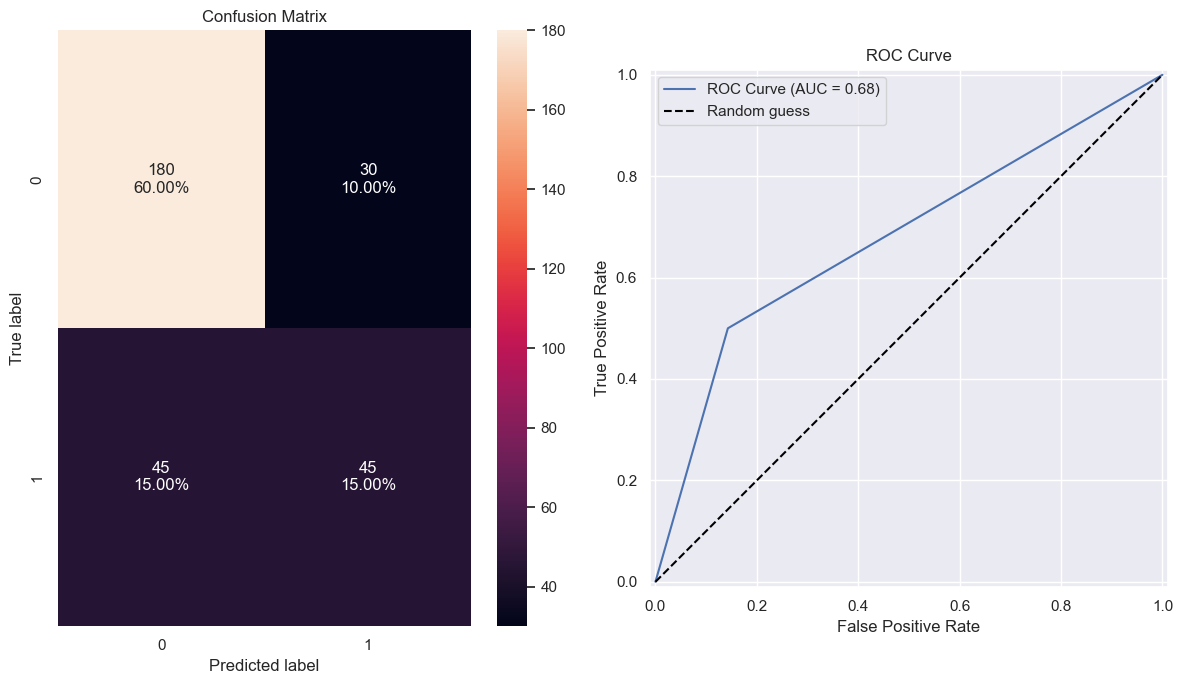

In [242]:
bagging_grid_train_metrics, bagging_grid_test_metrics = VisualizeMetrics.get_metrics(bagging_grid,
                                                            X_train_processed,y_train_processed,
                                                            X_test_processed,y_test_processed
                                                                                    )


1. The recall value on test data is 0.5 that is the model is able to correctly identify 50% of the customers who actually default in the test data.

2. AUC = 0.68 indicates that the model is better than the one obtained by random guessing(AUC=0.5).

3. From the above metrics on training data it is clear that the model is overfitting the training data.

#### 2. Random Forest

In [243]:
model = RandomForestClassifier(random_state=96)

params_grid = {
    "n_estimators": np.arange(10, 110, 5),
    'criterion':['gini','entropy','log_loss'],
    
}

recall_scorer = make_scorer(recall_score)

rf_grid_cv = GridSearchCV(estimator=model, param_grid=params_grid, scoring=recall_scorer, cv=5,n_jobs=-1)

rf_grid_cv.fit(X_train_processed,y_train_processed)

print(f'Optimal parameters are {rf_grid_cv.best_params_} with a cv score = {round(rf_grid_cv.best_score_,4)}')

Optimal parameters are {'criterion': 'entropy', 'n_estimators': 15} with a cv score = 0.4


In [244]:
rf_grid = RandomForestClassifier(**rf_grid_cv.best_params_,random_state=96)
rf_grid.fit(X_train_processed, y_train_processed)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=96)


Model used = RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=96)


Performance on Training data: 

    Recall  Accuracy   AUC  Precision  F1-score
0    0.96      0.99  0.98        1.0      0.98
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0    0.42      0.75  0.65       0.61       0.5
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




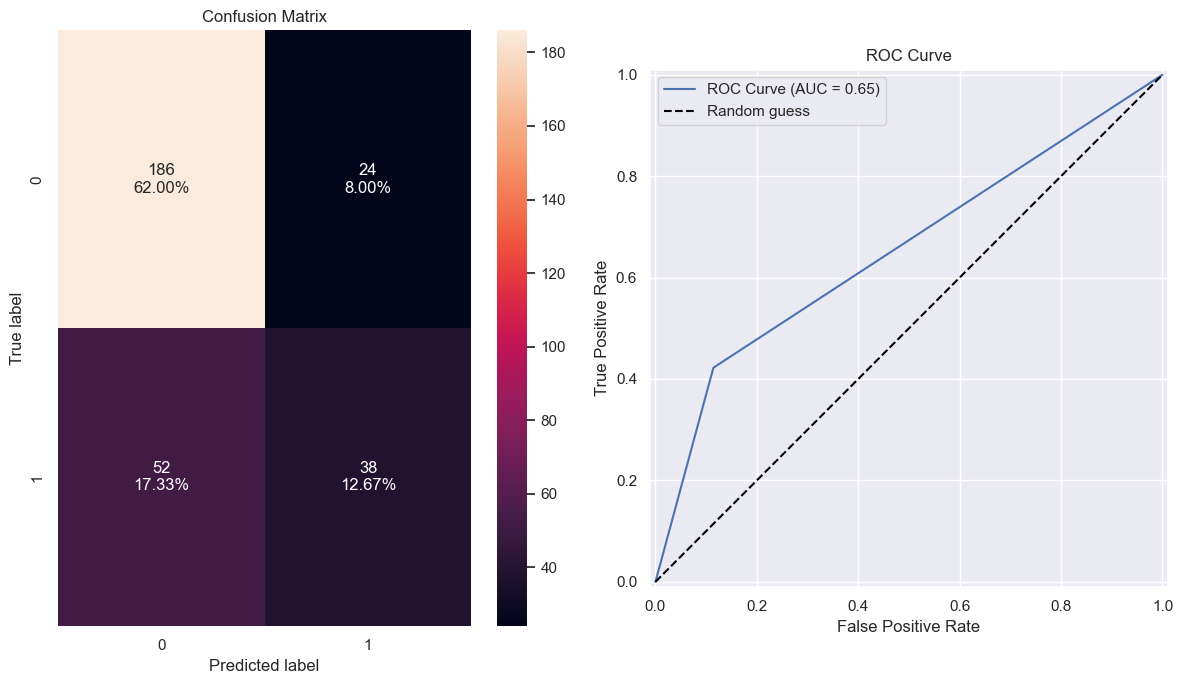

In [245]:
rf_grid_train_metrics, rf_grid_test_metrics = VisualizeMetrics.get_metrics(rf_grid,
                                                            X_train_processed,y_train_processed,
                                                            X_test_processed,y_test_processed
                                                                                    )


1. The recall value for random forest model on test data is 0.42 that is the model can correctly identify 42% of the customers who actually default in the test data.

2. AUC=0.65 indicates that the model is better than the obtained by random guessing.

3. The metrics obtained on training data indicate that the model is overfitting.

#### 3. GBM

In [246]:
model = GradientBoostingClassifier(random_state=96)


params_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05,1],
    "max_depth": [1,2,3]
}

recall_scorer = make_scorer(recall_score)

gbm_grid_cv = GridSearchCV(estimator=model, param_grid=params_grid, scoring=recall_scorer, cv=5,n_jobs=-1)

gbm_grid_cv.fit(X_train_processed,y_train_processed)

print(f'Optimal parameters are {gbm_grid_cv.best_params_} with a cv score = {round(gbm_grid_cv.best_score_,4)}')

Optimal parameters are {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 70} with a cv score = 0.5286


In [247]:
gbm_grid = GradientBoostingClassifier(**gbm_grid_cv.best_params_,random_state=96)
gbm_grid.fit(X_train_processed, y_train_processed)

GradientBoostingClassifier(learning_rate=1, n_estimators=70, random_state=96)


Model used = GradientBoostingClassifier(learning_rate=1, n_estimators=70, random_state=96)


Performance on Training data: 

    Recall  Accuracy  AUC  Precision  F1-score
0     1.0       1.0  1.0        1.0       1.0
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0    0.52      0.73  0.67       0.56      0.54
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




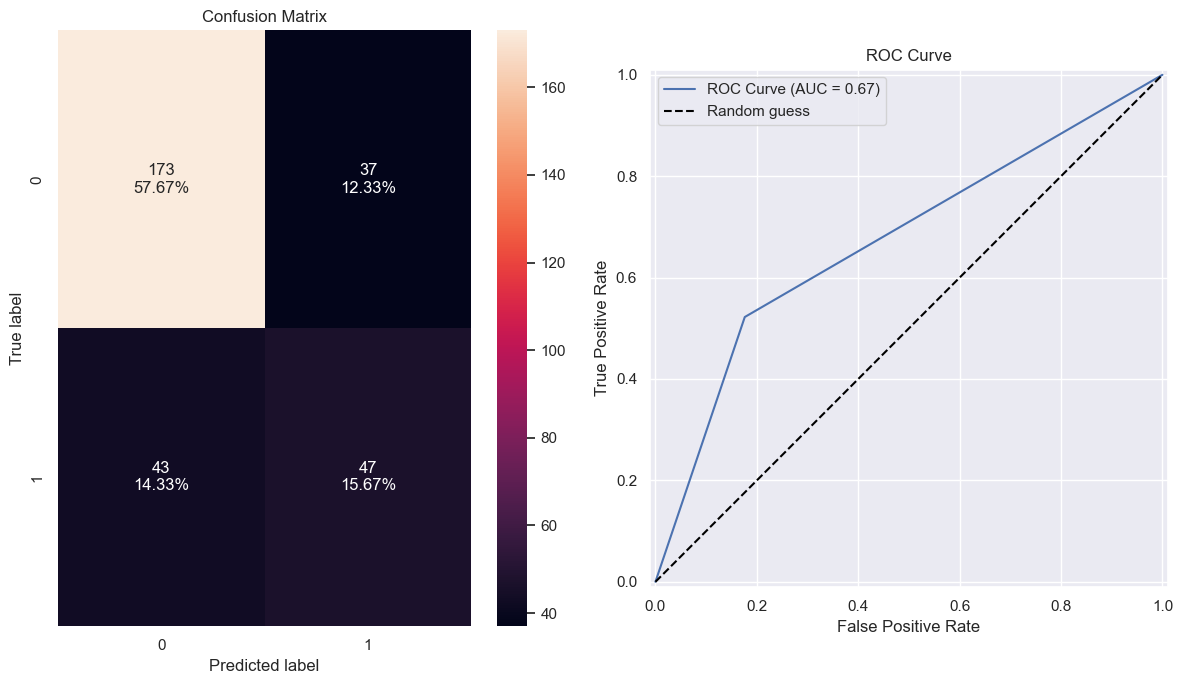

In [248]:
gbm_grid_train_metrics, gbm_grid_test_metrics = VisualizeMetrics.get_metrics(gbm_grid,
                                                            X_train_processed,y_train_processed,
                                                            X_test_processed,y_test_processed
                                                                                    )

1. The recall value for this model on test data is 0.52 which indicates that the GBM model is correctly predicting only 52% of the customers who actually default in the test data.

2. AUC=0.67 indicates that this model is better than the random guess model.

#### 4. Adaboost

In [249]:
model = AdaBoostClassifier(random_state=96,algorithm='SAMME')


params_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1,1.2,1.5,2],
}

recall_scorer = make_scorer(recall_score)

adaboost_grid_cv = GridSearchCV(estimator=model, param_grid=params_grid, scoring=recall_scorer, cv=5,n_jobs=-1)

adaboost_grid_cv.fit(X_train_processed,y_train_processed)

print(f'Optimal parameters are {adaboost_grid_cv.best_params_} with a cv score = {round(adaboost_grid_cv.best_score_,4)}')

Optimal parameters are {'learning_rate': 2, 'n_estimators': 10} with a cv score = 0.8381


In [250]:
adaboost_grid = AdaBoostClassifier(**adaboost_grid_cv.best_params_, algorithm='SAMME')
adaboost_grid.fit(X_train_processed,y_train_processed)

AdaBoostClassifier(algorithm='SAMME', learning_rate=2, n_estimators=10)


Model used = AdaBoostClassifier(algorithm='SAMME', learning_rate=2, n_estimators=10)


Performance on Training data: 

    Recall  Accuracy   AUC  Precision  F1-score
0    0.84       0.6  0.67       0.42      0.56
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0    0.87      0.61  0.69       0.43      0.57
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




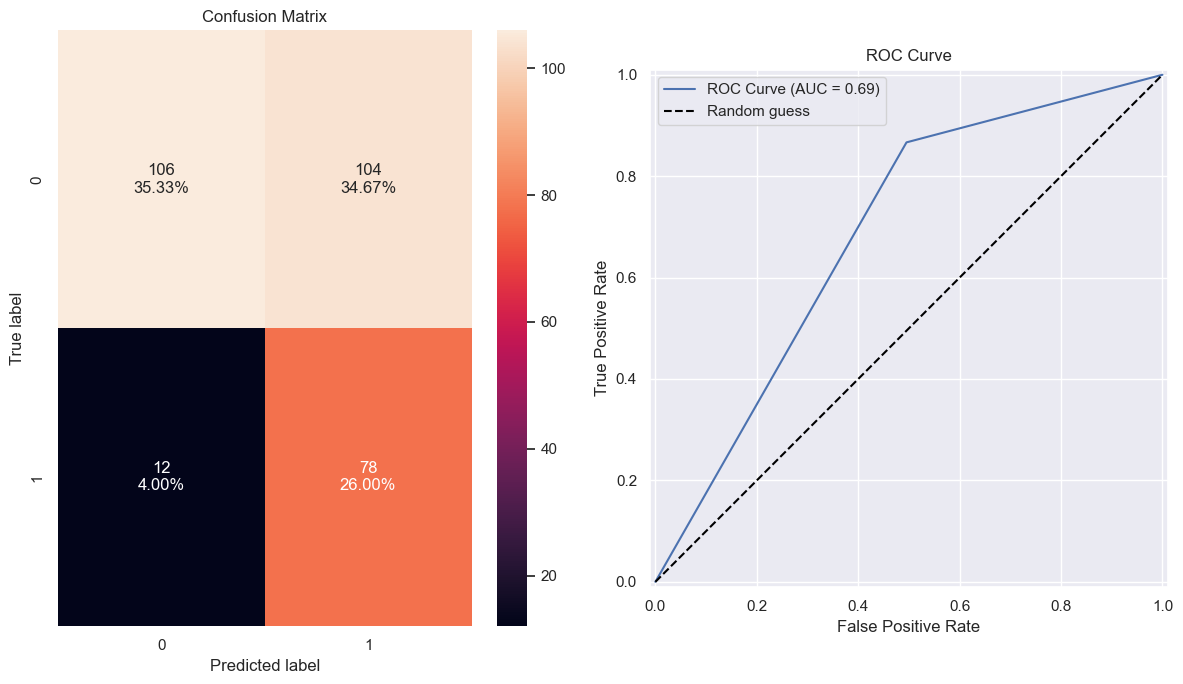

In [251]:
adaboost_grid_train_metrics, adaboost_grid_test_metrics = VisualizeMetrics.get_metrics(adaboost_grid,
                                                            X_train_processed,y_train_processed,
                                                            X_test_processed,y_test_processed
                                                                                    )

1. The recall value on test data is 0.87 that is the model is able to correctly predict 87% of the customers who actually default in the test data.

2. This model is not overfitting but it is unable to predict more number of customers who do not actually default.

#### 5. XGBoost

In [252]:
model = XGBClassifier(random_state=96,eval_metric='logloss')

params_grid={'n_estimators':[10,20,50,100],
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5),
}

recall_scorer = make_scorer(recall_score)

xgboost_grid_cv = GridSearchCV(estimator=model, param_grid=params_grid, scoring=recall_scorer, cv=5,n_jobs=-1)

xgboost_grid_cv.fit(X_train_processed,y_train_processed)

print(f'Optimal parameters are {xgboost_grid_cv.best_params_} with a cv score = {round(xgboost_grid_cv.best_score_,4)}')

Optimal parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10, 'scale_pos_weight': 5, 'subsample': 0.8} with a cv score = 1.0


In [253]:
xgboost_grid = XGBClassifier(**xgboost_grid_cv.best_params_)
xgboost_grid.fit(X_train_processed,y_train_processed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Model used = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Performance on Training data: 

    Recall  Accuracy  AUC  Precision  F1-score
0     1.0       0.3  0.5        0.3      0.46
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy  AUC  Pre

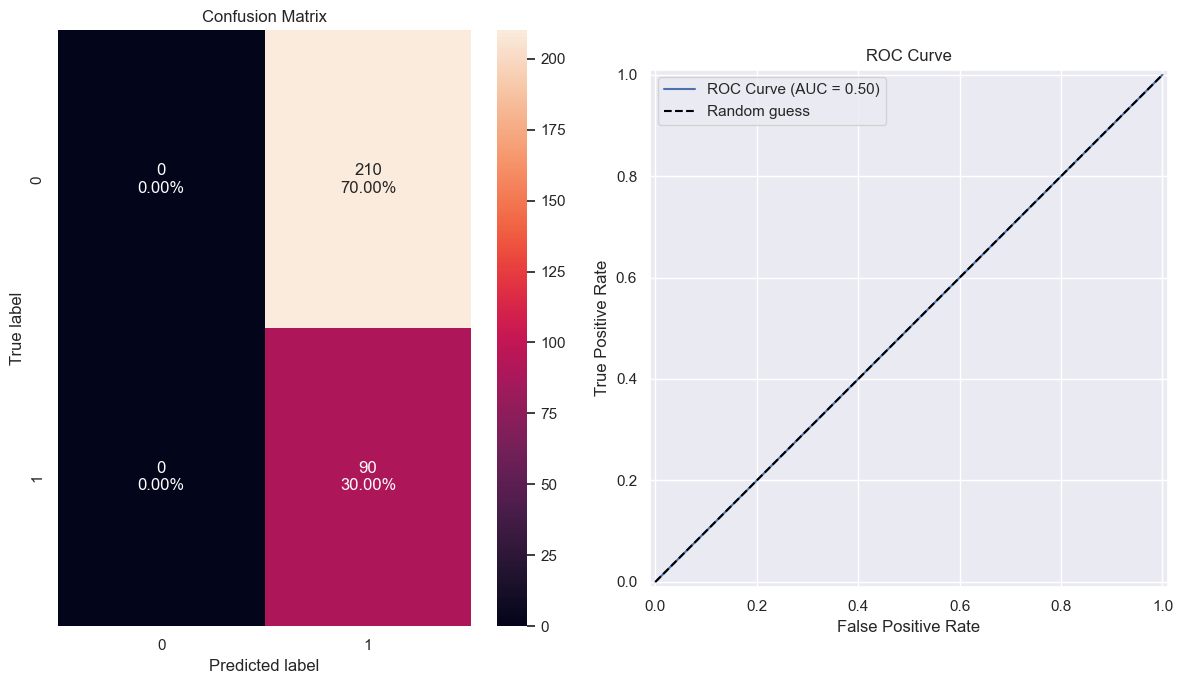

In [254]:
xgboost_grid_train_metrics, xgboost_grid_test_metrics = VisualizeMetrics.get_metrics(xgboost_grid,
                                                            X_train_processed,y_train_processed,
                                                            X_test_processed,y_test_processed
                                                                                    )

XGBoost model is only learning the customers that actually default but it is not learning the customers that do not default. It's AUC is 0.5 which is same as that of random guess. This model can only be used to predict the customers that actually default. This XGBoost model predicts every customer as a potential defaulter. It cannot distinguish between defaulters and non-defaulters.

#### 6. Catboost

In [255]:
cat = CatBoostClassifier(random_state=96, verbose=0, iterations=500, learning_rate=0.15,
                         depth=6, loss_function='MultiClass')
cat.fit(X_train_processed, y_train_processed)



Model used = <catboost.core.CatBoostClassifier object at 0x31ea4ffd0>


Performance on Training data: 

    Recall  Accuracy  AUC  Precision  F1-score
0     1.0       1.0  1.0        1.0       1.0
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0    0.57      0.77  0.71       0.64       0.6
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




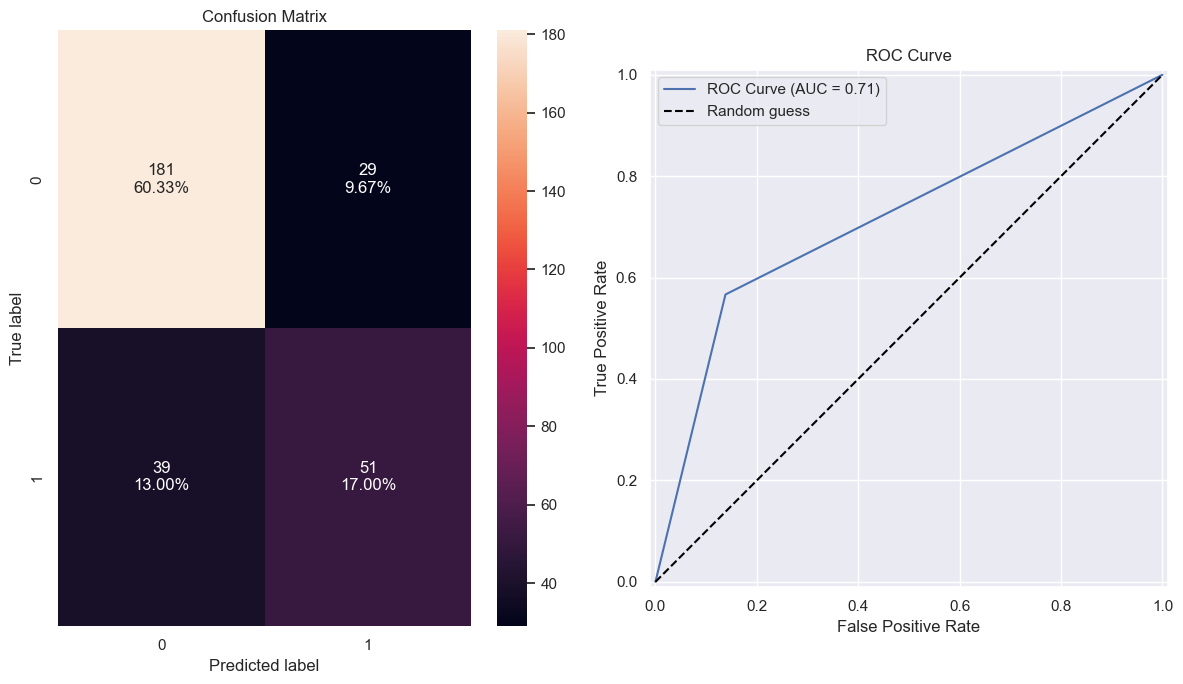

In [256]:
cat_train_metrics, cat_test_metrics = VisualizeMetrics.get_metrics(cat, X_train_processed,y_train_processed,
                                                                   X_test_processed,y_test_processed)

It has a recall of 0.57 on test data indicating that the model correctly predicts 57% of the customers that actually default in the test data.
   

#### 7. LightGBM

In [257]:
param = {'num_leaves':25, 'objective':'binary','metric':'binary_logloss'}

lgbm = LGBMClassifier(**param,random_state=96,)

lgbm.fit(X_train_processed,y_train_processed)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 210, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(metric='binary_logloss', num_leaves=25, objective='binary',
               random_state=96)


Model used = LGBMClassifier(metric='binary_logloss', num_leaves=25, objective='binary',
               random_state=96)


Performance on Training data: 

    Recall  Accuracy  AUC  Precision  F1-score
0     1.0       1.0  1.0        1.0       1.0
--------------------------------------------------

Performance on Test data:

    Recall  Accuracy   AUC  Precision  F1-score
0    0.56      0.77  0.71       0.63      0.59
--------------------------------------------------

Confusion Matrix and ROC Curve on test data:




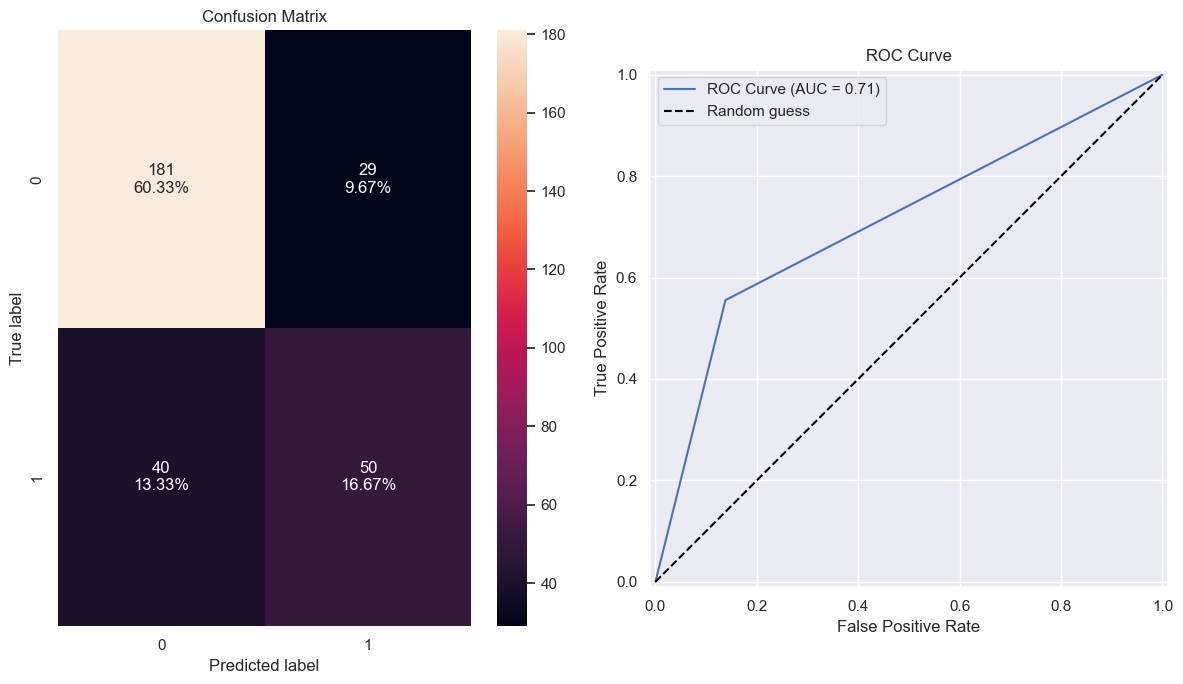

In [258]:
lgbm_train_metrics, lgbm_test_metrics = VisualizeMetrics.get_metrics(lgbm, X_train_processed, y_train_processed
                                                                    , X_test_processed, y_test_processed)


LightGBM model has a recall of 0.56 on test data that is it can correctly predict 56% of the customers that actually default in the test data.

## Comparing models

In [259]:
compare_train_model_df = pd.concat([
    bagging_grid_train_metrics.T,
    rf_grid_train_metrics.T,
    gbm_grid_train_metrics.T,
    adaboost_grid_train_metrics.T,
    xgboost_grid_train_metrics.T,
    cat_train_metrics.T,
    lgbm_train_metrics.T
], axis=1)

compare_train_model_df.columns = [
    'Bagging Classifier',
    'Random Forest Classifier',
    'GBM Classifier',
    'AdaBoost Classifier',
    'XGBoost Classifier',
    'CatBoost Classifier',
    'LGBM Classifier'
]

print('\nTraining Performance:\n')
compare_train_model_df


Training Performance:



,Bagging Classifier,Random Forest Classifier,GBM Classifier,AdaBoost Classifier,XGBoost Classifier,CatBoost Classifier,LGBM Classifier
Recall,1.0,0.96,1.0,0.84,1.00,1.0,1.0
Accuracy,1.0,0.99,1.0,0.60,0.30,1.0,1.0
AUC,1.0,0.98,1.0,0.67,0.50,1.0,1.0
Precision,1.0,1.00,1.0,0.42,0.30,1.0,1.0
F1-score,1.0,0.98,1.0,0.56,0.46,1.0,1.0


In [260]:
compare_test_model_df = pd.concat([
    bagging_grid_test_metrics.T,
    rf_grid_test_metrics.T,
    gbm_grid_test_metrics.T,
    adaboost_grid_test_metrics.T,
    xgboost_grid_test_metrics.T,
    cat_test_metrics.T,
    lgbm_test_metrics.T
], axis=1)

compare_test_model_df.columns = [
    'Bagging Classifier',
    'Random Forest Classifier',
    'GBM Classifier',
    'AdaBoost Classifier',
    'XGBoost Classifier',
    'CatBoost Classifier',
    'LGBM Classifier'
]

print('\nTest Performance:\n')
compare_test_model_df


Test Performance:



,Bagging Classifier,Random Forest Classifier,GBM Classifier,AdaBoost Classifier,XGBoost Classifier,CatBoost Classifier,LGBM Classifier
Recall,0.50,0.42,0.52,0.87,1.00,0.57,0.56
Accuracy,0.75,0.75,0.73,0.61,0.30,0.77,0.77
AUC,0.68,0.65,0.67,0.69,0.50,0.71,0.71
Precision,0.60,0.61,0.56,0.43,0.30,0.64,0.63
F1-score,0.55,0.50,0.54,0.57,0.46,0.60,0.59


## Observations

1. In the banking context, customers who are likely to default will cause more loss than the customers that do not default. It is essential to focus on customers that default rather than the customers that do not default. Recall metric is used to understand which model is better in predicting customers that are likely to default. 

2. Recall indicates the ability of the model to rightly predict all the positive(1) labels or observations. In this context, it indicates which model is better at identifying the customers that actually default or likely to default. Recall value carries more weightage because the bank intends to build an ML model that correctly predicts the customers who are likely to default.

3. Out of all the models,XGboost classifier has a recall of 1 on both training data and test data. This suggests that the XGBoost model predicts all the customers as defaulters. It cannot distinguish between defaulters and non-defaulters.

4. AUC is a metric that indicates how well a model can differentiate between customers that default and those who don't. LGBM and CatBoost models have an AUC of 1 in both training and test sets.

5. Accuracy indicates the total percentage of correct prediction(both 0 and 1). Catboost, LGBM, GBM,Bagging and Random Forest classifiers have high accuracy values on training data but on test data Catboost and LGBM have high accuray. This metric cannot be used solely to determine which model is better because of the class imbalance in the data.

6. Precision indicates the percentage of true positives(TP) among all the predicted positives(TP + FP). Catboost, LGBM, Random Forest models have high precision on test data whereas Bagging, Random Forest, GBM, Catboost and LGBM have high precision(1) on training data.

7. Based on the problem context and above metrics, AdaBoost model is the best model to predict the customers that are likely to default because of high recall, good accuracy and decent precision values on the test dataset. It is followed by CatBoost, LightGBM and GBM.

#### Feature importance in AdaBoost models

In [261]:
adaboost_grid_feature_imp = ada_grid.feature_importances_
sorted_indices = adaboost_grid_feature_imp.argsort()[::-1]
sorted_feature_names = [X_train_processed.columns[i] for i in sorted_indices]
sorted_feat_imp = adaboost_grid_feature_imp[sorted_indices]

for i in range(len(sorted_feature_names)):
    print('Feature importance of',sorted_feature_names[i], '=',sorted_feat_imp[i])

Feature importance of num_tnf__amount = 0.2
Feature importance of remainder__months_loan_duration = 0.2
Feature importance of ord_tnf__credit_history = 0.1
Feature importance of nominal_tnf__checking_balance_1 - 200 DM = 0.05
Feature importance of ord_tnf__employment_duration = 0.05
Feature importance of nominal_tnf__housing_own = 0.05
Feature importance of nominal_tnf__purpose_education = 0.05
Feature importance of nominal_tnf__savings_balance_lessthan_100DM = 0.05
Feature importance of remainder__age = 0.05
Feature importance of remainder__years_at_residence = 0.05
Feature importance of nominal_tnf__checking_balance_unknown = 0.05
Feature importance of remainder__percent_of_income = 0.05
Feature importance of nominal_tnf__checking_balance_greaterthan_200DM = 0.05
Feature importance of nominal_tnf__checking_balance_lessthan_0DM = 0.0
Feature importance of nominal_tnf__job_skilled = 0.0
Feature importance of nominal_tnf__phone_yes = 0.0
Feature importance of nominal_tnf__housing_other 

The top three important features of the dataset for AdaBoost model are amount, months_loan_duration and credit_history.